In [2]:
!pip install xlrd
!pip install pycountry-convert
!pip install factor_analyzer

In [1]:
#Importing Libraries
import os
import pandas as pd
import numpy as np
import utility as util
import matplotlib.pyplot as plt
from factor_analyzer.factor_analyzer import FactorAnalyzer
import seaborn as sns
import plotly
import plotly.graph_objects as go    # for data visualisation
import plotly.figure_factory as ff
import plotly.express as px
from pycountry_convert import country_name_to_country_alpha3 # for choropleth maps

In [2]:
#import data_set
worksheets = pd.ExcelFile('../vuln_data/Shodan Data.xlsx')
worksheets.sheet_names

worksheet={}
for ws_name in worksheets.sheet_names:
    worksheet[ws_name]=pd.read_excel('../vuln_data/Shodan Data.xlsx', sheet_name=ws_name)



In [10]:
#Cities with a city-wide circular strategy (https://www.c40.org/researches/municipality-led-circular-economy)
C40=['Amsterdam', 'Brussels', 'Cape Town', 'Copenhagen', 'Glasgow', 'Gothenburg', 'Helsinki', 'Kristiansand', 'Ljubljana', 'London', 'Maribor', 'Paris', 'Phoenix', 'Samso', 'Seoul', 'Tel Aviv']



smart_cities=worksheet['smart-cities']
smart_cities[smart_cities['smart_city'].isin(C40)]

smart_city  population_2020        population_source  overall_rating  \
2    Amsterdam          1148972  World Population Review               8   
18    Brussels          2080788  World Population Review               5   
24   Cape Town          4617560  World Population Review               2   
28  Copenhagen          1346485  World Population Review               9   
34  Gothenburg           610521  World Population Review               7   
39    Helsinki          1304851  World Population Review               8   
49      London          9304016  World Population Review               7   
69       Paris         11017230  World Population Review               6   
81       Seoul          9963452  World Population Review               6   
90    Tel Aviv          4181479  World Population Review               6   

    overall_ranking capture_date  totalcount  CVE-2017-1000369  \
2                11   2020-02-08     1642976               875   
18               64   2020-02-08      384095                11   
24               93   2020-02-08           0                 0   
28                5   2020-02-08       30264                 1   
34               28   2020-02-08       23468                 8   
39                8   2020-02-08      331487               471   
49               20   2020-02-08     2808970              1192   
69               51   2020-02-08     1216286               341   
81               47   2020-02-08      319709                43   
90               46   2020-02-08           0                 0   

    CVE-2017-1000600  CVE-2017-1001000  ...  CVE-2019-9712  CVE-2019-9713  \
2                468                19  ...              1              0   
18                64                 1  ...              0              0   
24                 0                 0  ...              0              0   
28                 5                 0  ...              0              0   
34                10                 0  ...              0              0   
39                40                 2  ...              1              1   
49               507                29  ...              1              1   
69               129                 3  ...              0              0   
81                36                 7  ...              0              0   
90                 0                 0  ...              0              0   

    CVE-2019-9714  CVE-2019-9787  CVE-2020-0796  CVE-2020-11651  \
2               1            846            302               2   
18              0            128             31               0   
24              0              0              0               0   
28              0             10             31               0   
34              0             14             47               0   
39              1            101            321               1   
49              1           1107            202               2   
69              0            221            197               1   
81              0             76             81               0   
90              0              0              0               0   

    CVE-2020-11652  CVE-2020-1938  CVE-2020-5902  MS17-010  
2                2            174             20        15  
18               0             16              0         2  
24               0              0              0         0  
28               0              3              0         0  
34               0              2              0         0  
39               1             20              0        14  
49               2            267              3       147  
69               1             44              8        39  
81               0            186              3         4  
90               0              0              0         0  

[10 rows x 323 columns]

In [55]:
cim=worksheet['cities-in-motion']

print(set(cim[cim.city.isin(C40)].city) & set(smart_cities[smart_cities['smart_city'].isin(C40)].smart_city))

top20_cim_tech=cim.sort_values(by='technology', ascending=True).head(20)

print(set(cim[cim.city.isin(C40)].city) & set(top20_cim_tech['city']))

{'Amsterdam', 'Copenhagen', 'Seoul', 'Brussels', 'London', 'Paris', 'Cape Town', 'Helsinki', 'Tel Aviv'}
{'Seoul', 'Copenhagen', 'Amsterdam', 'London', 'Paris'}


In [48]:
exposure=worksheet['exposure-count']
df_cities=worksheet['cities']

cvetest=exposure.iloc[25]
cvecity=cvetest.vulnerable_cities.split(',')

print(cvetest)
print(df_cities[df_cities.city.isin(cvecity)])
#cvetest


vulnerability                                                   CVE-2017-14722
capture_date                                               2020-10-22 00:00:00
totalcount                                                                7735
exploit_source                                                             NVD
exploit_type                                                    remote,webapps
exploit_platform                                                     Wordpress
exploit_vendor                                                       Wordpress
exploit_attack                                             Directory Traversal
vulnerable_cities            Tokyo,London,Dublin,Singapore,Amsterdam,Sydney...
vulnerable_services          Apache,OpenSSH,PostgreSQL,nginx,lighttpd,Apach...
cvss_source                                                                NVD
cvss3_basescore                                                            7.5
cvss3_severity                                      

In [5]:
#worksheet['data-legend']

df_pivot=worksheet['smart-cities'][worksheet['smart-cities'].totalcount>200000].iloc[:,np.r_[0:1,7:323]].T
df_pivot=df_pivot.rename(columns=df_pivot.iloc[0])
df_pivot=df_pivot.drop(df_pivot.index[0])
df_pivot

Amsterdam Bangkok Beijing Bengaluru Berlin Brussels Chicago  \
CVE-2017-1000369       875      60      10        92    107       11      62   
CVE-2017-1000600       468      23      17        51     37       64      45   
CVE-2017-1001000        19       3       0         2      0        1       0   
CVE-2017-10140           0       0       0         2      0        0       0   
CVE-2017-10391           3       0       1         6      0        0       0   
...                    ...     ...     ...       ...    ...      ...     ...   
CVE-2020-11651           2       1       0         0      0        0       0   
CVE-2020-11652           2       1       0         0      0        0       0   
CVE-2020-1938          174      64     434       108     21       16      13   
CVE-2020-5902           20       5       6         1      0        0       3   
MS17-010                15      18       5        28      1        2      11   

                 Denver Dublin Helsinki  ... Seoul Shanghai Shenzhen  \
CVE-2017-1000369      4     52      471  ...    43        7       94   
CVE-2017-1000600     21    495       40  ...    36       14       30   
CVE-2017-1001000      0     26        2  ...     7        2        2   
CVE-2017-10140        0      0        0  ...     0        0        0   
CVE-2017-10391        0      2        5  ...     0        0        0   
...                 ...    ...      ...  ...   ...      ...      ...   
CVE-2020-11651        0      4        1  ...     0        0        0   
CVE-2020-11652        0      4        1  ...     0        0        0   
CVE-2020-1938         3    111       20  ...   186      236      360   
CVE-2020-5902         0      4        0  ...     3        6        0   
MS17-010              3     26       14  ...     4        2        0   

                 Singapore Stockholm Sydney Tokyo Toronto Washington Zurich  
CVE-2017-1000369       883        30     92    71     128         11     26  
CVE-2017-1000600       380        31    249   787     125         54     13  
CVE-2017-1001000        19         1     21    75       6          0      1  
CVE-2017-10140           1         0      0     0       0          0      0  
CVE-2017-10391          23         0     13     0       4          2      0  
...                    ...       ...    ...   ...     ...        ...    ...  
CVE-2020-11651           2         0      2     1       1          2      0  
CVE-2020-11652           2         0      2     1       1          2      0  
CVE-2020-1938          229         4     51   181      27         18     12  
CVE-2020-5902           10         0      7     7       2         39      0  
MS17-010                40         6     33    37      12          9      3  

[316 rows x 29 columns]

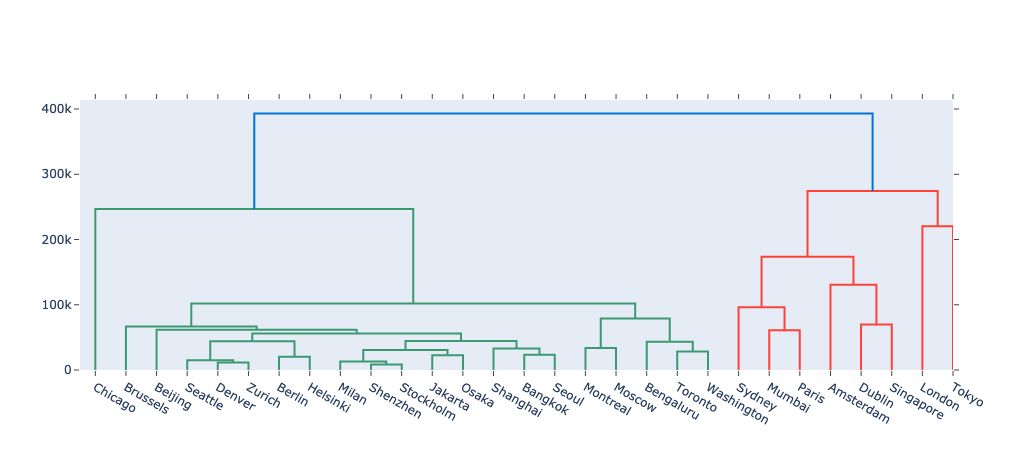

In [6]:
fig = ff.create_dendrogram(df_pivot.T, labels=df_pivot[0:].columns)
fig.show()

In [38]:
### Factor analysis
for i in df_pivot.columns:
    df_pivot[i]=df_pivot[i].astype(float)
chi_square_value,p_value=calculate_bartlett_sphericity(df_pivot)
print(chi_square_value, p_value, ('not significant', 'significant')[p_value<0.05])


42694.94854849379 0.0 significant


/opt/anaconda3/envs/enisa/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning:

In future, it will be an error for 'np.bool_' scalars to be interpreted as an index



In [41]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(rotation='varimax')
f=fa.fit(df_pivot)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
print('number of factors:',f.n_factors)

number of factors: 3


/opt/anaconda3/envs/enisa/lib/python3.7/site-packages/sklearn/utils/validation.py:933: FutureWarning:

Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.



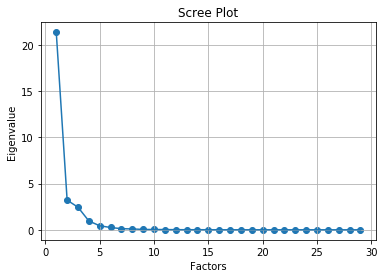

In [42]:
# Confirm graphically the number of factors (i.e. where Eigenvalue>1)
plt.scatter(range(1,df_pivot.shape[1]+1),ev)
plt.plot(range(1,df_pivot.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [43]:
# create correlation matrix and loadings matrix as dataframes
res_correlation=pd.DataFrame(fa.corr_,columns=df_pivot.columns, index=df_pivot.columns)
res_loadings=pd.DataFrame(fa.loadings_,columns=['factor_' + str(i) for i in range(1,fa.n_factors+1)], index=df_pivot.columns)
res_loadings

factor_1  factor_2  factor_3
Amsterdam   0.917550  0.261626  0.292883
Bangkok     0.369042  0.864850  0.163599
Beijing     0.142970  0.442035  0.717444
Bengaluru   0.951646  0.119062  0.080765
Berlin      0.872079  0.237885  0.357015
Brussels    0.588363  0.279668  0.175297
Chicago     0.061161  0.201527  0.952853
Denver      0.421221  0.213731  0.835391
Dublin      0.789510  0.569546  0.183523
Helsinki    0.934386  0.297027  0.163236
Jakarta     0.633054  0.714438  0.142636
London      0.833664  0.332229  0.432110
Milan       0.222053  0.928723  0.160800
Montreal    0.654444  0.716441  0.235187
Moscow      0.658330  0.660378  0.241018
Mumbai      0.827983  0.487851  0.156516
Osaka       0.374506  0.867989  0.217351
Paris       0.779093  0.554286  0.271864
Seattle     0.387340  0.111990  0.912417
Seoul       0.561660  0.713974  0.219769
Shanghai    0.216442  0.761766  0.281404
Shenzhen    0.148308  0.971542  0.146480
Singapore   0.739242  0.603932  0.213596
Stockholm   0.211906  0.946464  0.163453
Sydney      0.515853  0.818517  0.169585
Tokyo       0.540996  0.760886  0.291291
Toronto     0.898801  0.317454  0.284281
Washington  0.856021  0.411407  0.234344
Zurich      0.639883  0.203715  0.731585

From the above, we group the cities under the corresponding factor, having the highest loading (i.e. highest number per row):
* group 1: Amsterdam, Bengaluru, Berlin, Brussels, Dublin, Helsinki, London, Mumbai, Paris, Singapore, Toronto, Washington, Zurich
* group 2: Bangkok, Jakarta, Milan, Montreal, Moscow, Osaka,Seoul, Shanghai, Shenzhen, Stockholm, Sydney, Tokyo
* group 3: Beijing, Chicago, Denver, Seattle, Zurich

In [44]:
# from https://stackoverflow.com/questions/20799403/improving-performance-of-cronbach-alpha-code-python-numpy
# define Chronbach's alpha - this code is not computationally efficient, use with care

def svar(X):
    n = float(len(X))
    svar=(sum([(x-np.mean(X))**2 for x in X]) / n)* n/(n-1.)
    return svar


def CronbachAlpha(itemscores):
    itemvars = [svar(item) for item in itemscores]
    tscores = [0] * len(itemscores[0])
    for item in itemscores:
       for i in range(len(item)):
          tscores[i]+= item[i]
    nitems = len(itemscores)
    #print "total scores=", tscores, 'number of items=', nitems

    Calpha=nitems/(nitems-1.) * (1-sum(itemvars)/ svar(tscores))

    return Calpha

In [49]:
items1=df_pivot[['Amsterdam', 'Bengaluru', 'Berlin', 'Brussels', 'Dublin', 'Helsinki', 'London', 'Mumbai', 'Paris', 'Singapore', 'Toronto', 'Washington', 'Zurich']].T
itemscores1=np.ndarray.tolist(items1.values)
items2=df_pivot[['Bangkok', 'Jakarta', 'Milan', 'Montreal', 'Moscow', 'Osaka','Seoul', 'Shanghai', 'Shenzhen', 'Stockholm', 'Sydney', 'Tokyo']].T
itemscores2=np.ndarray.tolist(items2.values)
items3=df_pivot[['Beijing', 'Chicago', 'Denver', 'Seattle', 'Zurich']].T
itemscores3=np.ndarray.tolist(items3.values)


print('Factor 1 (group 1):',CronbachAlpha(itemscores1))
print('Factor 2 (group 2):',CronbachAlpha(itemscores2))
print('Factor 3 (group 3):',CronbachAlpha(itemscores3))


Factor 1 (group 1): 0.9445268794550788
Factor 2 (group 2): 0.9036497917508187
Factor 3 (group 3): 0.6817292695777859


# 1.0 Cities in Motion

In [51]:
df_city=worksheet['cities']

In [52]:
#cities in motion dataframe 
df_cim=worksheet['cities-in-motion']

In [53]:
top_20_cim=df_cim.sort_values(by='cities_in_motion')['city'].head(20)
top_20_vuln_cities=df_city.sort_values(by='totalcount', ascending=False).head(20)['city']
top_20_cim

0        New York
1          London
2           Paris
3           Tokyo
4       Reykjavik
5       Singapore
6           Seoul
7         Toronto
8       Hong Kong
9       Amsterdam
10         Berlin
11      Melbourne
12     Copenhagen
13        Chicago
14         Sydney
15      Stockholm
16    Los Angeles
17     Wellington
18         Vienna
19     Washington
Name: city, dtype: object

In [102]:
df_city_extended=pd.merge(df_cim, df_city[['city','population_2020','totalcount']], on='city', how='inner')
df_city_extended['vuln_per_100k']=df_city_extended.totalcount/(df_city_extended.population_2020/100000)
df_city_extended.columns

/opt/anaconda3/envs/enisa/lib/python3.7/site-packages/pandas/core/series.py:856: RuntimeWarning:

divide by zero encountered in log10



Index(['city', 'country', 'economy', 'human_capital', 'social_cohesion',
       'environment', 'goverance', 'urban_planning', 'international_outreach',
       'technology', 'mobility_and_transportation', 'cities_in_motion',
       'population_2020', 'totalcount', 'vuln_per_100k', 'vuln_per_100k_log'],
      dtype='object')

In [103]:
corr=df_city_extended[df_city_extended.totalcount>200][['economy', 'human_capital', 'social_cohesion',
       'environment', 'goverance', 'urban_planning', 'international_outreach',
       'technology', 'mobility_and_transportation', 'cities_in_motion',
       'population_2020', 'totalcount', 'vuln_per_100k']].corr()
corr

economy  human_capital  social_cohesion  \
economy                      1.000000       0.933784         0.565734   
human_capital                0.933784       1.000000         0.610065   
social_cohesion              0.565734       0.610065         1.000000   
environment                 -0.006630       0.106607         0.464932   
goverance                    0.844163       0.826392         0.639604   
urban_planning               0.669237       0.712253         0.642911   
international_outreach       0.517056       0.546798         0.192019   
technology                   0.758228       0.780454         0.634332   
mobility_and_transportation  0.506065       0.559614         0.570868   
cities_in_motion             0.884160       0.905389         0.741364   
population_2020              0.310145       0.547465         0.454964   
totalcount                  -0.361736      -0.343124         0.111199   
vuln_per_100k               -0.374117      -0.379944         0.002460   

                             environment  goverance  urban_planning  \
economy                        -0.006630   0.844163        0.669237   
human_capital                   0.106607   0.826392        0.712253   
social_cohesion                 0.464932   0.639604        0.642911   
environment                     1.000000   0.184866       -0.076667   
goverance                       0.184866   1.000000        0.572677   
urban_planning                 -0.076667   0.572677        1.000000   
international_outreach          0.247685   0.430670        0.288748   
technology                      0.317804   0.766726        0.680835   
mobility_and_transportation     0.197120   0.391543        0.552661   
cities_in_motion                0.345479   0.838186        0.709676   
population_2020                 0.051342   0.341672        0.643722   
totalcount                      0.254844  -0.142868       -0.267805   
vuln_per_100k                   0.189206  -0.137474       -0.373902   

                             international_outreach  technology  \
economy                                    0.517056    0.758228   
human_capital                              0.546798    0.780454   
social_cohesion                            0.192019    0.634332   
environment                                0.247685    0.317804   
goverance                                  0.430670    0.766726   
urban_planning                             0.288748    0.680835   
international_outreach                     1.000000    0.720735   
technology                                 0.720735    1.000000   
mobility_and_transportation                0.332116    0.601281   
cities_in_motion                           0.683492    0.933725   
population_2020                            0.239675    0.515390   
totalcount                                -0.405583   -0.303875   
vuln_per_100k                             -0.390851   -0.377054   

                             mobility_and_transportation  cities_in_motion  \
economy                                         0.506065          0.884160   
human_capital                                   0.559614          0.905389   
social_cohesion                                 0.570868          0.741364   
environment                                     0.197120          0.345479   
goverance                                       0.391543          0.838186   
urban_planning                                  0.552661          0.709676   
international_outreach                          0.332116          0.683492   
technology                                      0.601281          0.933725   
mobility_and_transportation                     1.000000          0.643324   
cities_in_motion                                0.643324          1.000000   
population_2020                                 0.547994          0.488547   
totalcount                                     -0.127629         -0.304949   
vuln_per_100k                                  -0.162277   

In [88]:
#df_pivot=worksheet['smart-cities'][worksheet['smart-cities'].totalcount>200000].iloc[:,np.r_[0:1,7:323]].T
df_pivot=worksheet['smart-cities']
df_pivot=df_pivot[df_pivot.smart_city.isin(top_20_cim)].iloc[:,np.r_[0:1,7:323]].T
df_pivot=df_pivot.rename(columns=df_pivot.iloc[0])
df_pivot=df_pivot.drop(df_pivot.index[0])
df_pivot

Amsterdam Berlin Chicago Copenhagen Hong Kong London  \
CVE-2017-1000369       875    107      62          1         0   1192   
CVE-2017-1000600       468     37      45          5         0    507   
CVE-2017-1001000        19      0       0          0         0     29   
CVE-2017-10140           0      0       0          0         0      0   
CVE-2017-10391           3      0       0          0         0      1   
...                    ...    ...     ...        ...       ...    ...   
CVE-2020-11651           2      0       0          0         0      2   
CVE-2020-11652           2      0       0          0         0      2   
CVE-2020-1938          174     21      13          3         0    267   
CVE-2020-5902           20      0       3          0         0      3   
MS17-010                15      1      11          0         0    147   

                 Los Angeles Melbourne New York Paris Seoul Singapore  \
CVE-2017-1000369           0         6        0   341    43       883   
CVE-2017-1000600           0        30        0   129    36       380   
CVE-2017-1001000           0         1        0     3     7        19   
CVE-2017-10140             0         0        0     0     0         1   
CVE-2017-10391             0         0        0     5     0        23   
...                      ...       ...      ...   ...   ...       ...   
CVE-2020-11651             0         0        0     1     0         2   
CVE-2020-11652             0         0        0     1     0         2   
CVE-2020-1938              0         8        0    44   186       229   
CVE-2020-5902              0         1        0     8     3        10   
MS17-010                   0         3        0    39     4        40   

                 Stockholm Sydney Tokyo Toronto Vienna Washington  
CVE-2017-1000369        30     92    71     128     41         11  
CVE-2017-1000600        31    249   787     125     17         54  
CVE-2017-1001000         1     21    75       6      0          0  
CVE-2017-10140           0      0     0       0      2          0  
CVE-2017-10391           0     13     0       4      0          2  
...                    ...    ...   ...     ...    ...        ...  
CVE-2020-11651           0      2     1       1      1          2  
CVE-2020-11652           0      2     1       1      1          2  
CVE-2020-1938            4     51   181      27     15         18  
CVE-2020-5902            0      7     7       2      3         39  
MS17-010                 6     33    37      12      6          9  

[316 rows x 18 columns]

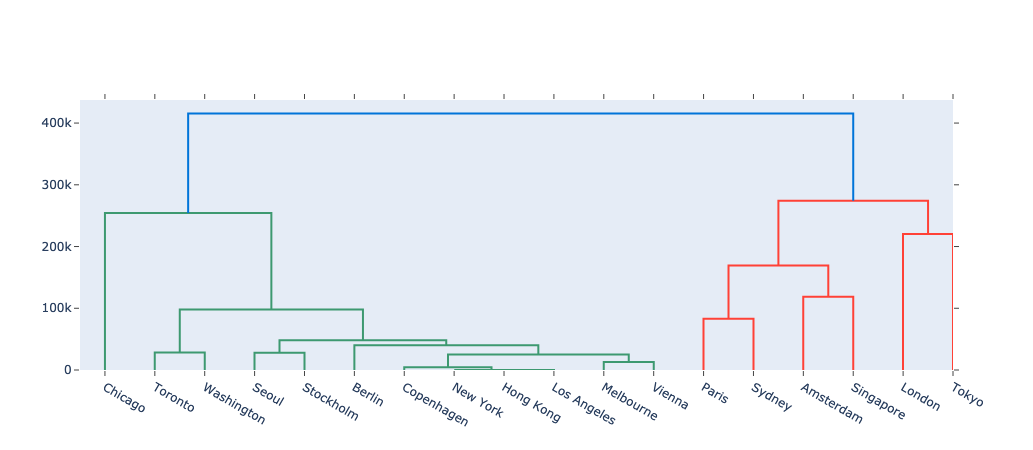

In [89]:
fig = ff.create_dendrogram(df_pivot.T, labels=df_pivot[0:].columns)
fig.show()

In [65]:
# most vulnerable cities from top 20 cities-in-motion

set(top_20_vuln_cities) & set(top_20_cim)

set()

In [118]:
#this is an example of bad and lazy coding :P
#trying to lookup the cities in motion index and add it to the frame
def get_cim(city_name):
    try:
        ans=df_cim[df_cim.city==city_name]['cities-in-motion'].values[0]
    except:
        ans=np.nan
    return ans

In [119]:
df_city['cim']=df_city['city'].map(get_cim)

In [120]:
df_city['totalcount_log']=np.log10(df_city['totalcount'])

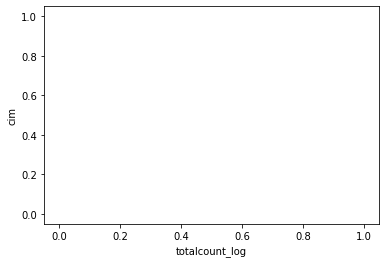

In [121]:
df_city[~df_city.cim.isna()].plot.scatter(x='totalcount_log',y='cim')

In [122]:
df_city[~df_city.cim.isna() & (df_city.totalcount>0)]['totalcount_log'].corr(df_city[~df_city.cim.isna() & (df_city.totalcount>0)]['cim'])

nan

In [123]:
df_cim[df_cim.city=="New York"]

city        country  economy  human_capital  social_cohesion  \
0  New York  United States        1              4              109   

   environment  goverance  urban_planning  international_outreach  technology  \
0           99         38               1                       3           5   

   mobility_and_transportation  cities_in_motion  
0                            4                 1

In [124]:
def get_tech(city_name):
    try:
        ans=df_cim[df_cim.city==city_name]['technology'].values[0]
    except:
        ans=np.nan
    return ans

df_city['technology']=df_city['city'].map(get_tech)

In [125]:
df_city=df_city[~df_city['technology'].isna()]

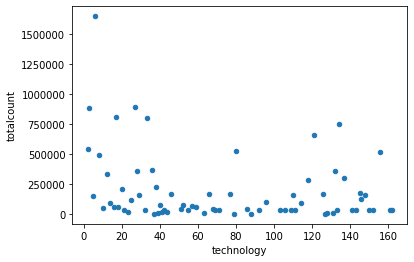

In [126]:
df_city.plot.scatter(x='technology',y='totalcount')

In [127]:
df_city.technology.corr(df_city.totalcount_log)

-0.17441409265633226

In [128]:
def get_econ(city_name):
    try:
        ans=df_cim[df_cim.city==city_name]['economy'].values[0]
    except:
        ans=np.nan
    return ans

df_city['economy']=df_city['city'].map(get_econ)

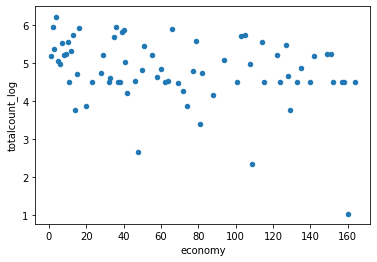

In [129]:
df_city.plot.scatter(x='economy',y='totalcount_log')

In [130]:
df_city.economy.corr(df_city.totalcount_log)

-0.3008446579337579

In [131]:
def get_x(city_name):
    try:
        ans=df_cim[df_cim.city==city_name]['international_outreach'].values[0]
    except:
        ans=np.nan
    return ans

df_city['x']=df_city['city'].map(get_x)

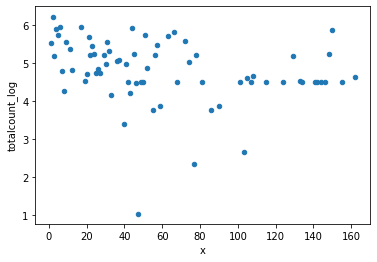

In [132]:
df_city.plot.scatter(x='x',y='totalcount_log')

In [133]:
df_city.x.corr(df_city.totalcount_log)

-0.26511389561485293

International outreach index seems to have the biggest absolute correlation with log totalcount: the higher the outreach (smaller value), the lesser the amount of vulnerabilities.

# 2.0 Exposure
## This section is all about the CVEs themselves. 2.1 shows the top 10 CVEs with the biggest exposure area.
### Numbers were sourced from Shodan.io

In [134]:
df_exposure=worksheet['exposure-count']
df_exposure

vulnerability capture_date  totalcount         exploit_source  \
0    CVE-2017-1000369   2020-10-22       82562  NVD,CVE,SecurityFocus   
1    CVE-2017-1000600   2020-10-22       50424      NVD,SecurityFocus   
2    CVE-2017-1001000   2020-10-22        1957                NVD,CVE   
3      CVE-2017-10140   2020-10-22         234                NVD,CVE   
4      CVE-2017-10391   2020-10-22         531      NVD,SecurityFocus   
..                ...          ...         ...                    ...   
311    CVE-2020-11651   2020-10-22          93                    NVD   
312    CVE-2020-11652   2020-10-22          93                    NVD   
313     CVE-2020-1938   2020-10-22       37041                    NVD   
314     CVE-2020-5902   2020-10-22         497                    NVD   
315          MS17-010   2020-10-22        9592              Shodan.io   

       exploit_type                     exploit_platform exploit_vendor  \
0             local                                 Exim           Exim   
1    remote,webapps                            Wordpress      Wordpress   
2    remote,webapps                            Wordpress      Wordpress   
3             local                              Postfix        Postfix   
4            remote              Oracle Glassfish Server         Oracle   
..              ...                                  ...            ...   
311  remote,webapps                                 Salt      Saltstack   
312  remote,webapps                                 Salt      Saltstack   
313  remote,webapps  Apache JServ Protocol,Apache Tomcat         Apache   
314          remote                               BIG-IP             f5   
315     remote, dos                                  SMB      Microsoft   

                                        exploit_attack  \
0       Arbitrary Code Execution, Privilege Escalation   
1                                       Code Execution   
2                                Write Arbitrary Files   
3                                 Privilege Escalation   
4                                  Unauthorised Access   
..                                                 ...   
311       Unauthorised Access,Arbitrary Code Execution   
312                 Unauthorised Access,Code Execution   
313  Code Execution,Information Disclosure,Arbitrar...   
314                                     Code Exeuction   
315                                     Code Execution   

                                     vulnerable_cities  \
0    Tokyo,London,Dublin,Singapore,Amsterdam,Sydney...   
1    Tokyo,London,Dublin,Singapore,Amsterdam,Sydney...   
2    Tokyo,London,Dublin,Singapore,Amsterdam,Sydney...   
3                                            Singapore   
4    London,Dublin,Singapore,Amsterdam,Sydney,Mumba...   
..                                                 ...   
311  Tokyo,London,Dublin,Singapore,Amsterdam,Sydney...   
312  Tokyo,London,Dublin,Singapore,Amsterdam,Sydney...   
313  Tokyo,London,Dublin,Singapore,Amsterdam,Sydney...   
314  Tokyo,London,Dublin,Singapore,Amsterdam,Sydney...   
315  Tokyo,London,Dublin,Singapore,Amsterdam,Sydney...   

                                   vulnerable_services  ... cvss2_basescore  \
0    Apache,OpenSSH,PostgreSQL,nginx,lighttpd,Apach...  ...             2.1   
1    Apache,OpenSSH,PostgreSQL,nginx,lighttpd,Apach...  ...             6.5   
2    Apache,OpenSSH,PostgreSQL,nginx,lighttpd,Apach...  ...             5.0   
3    Apache,OpenSSH,PostgreSQL,nginx,lighttpd,Apach...  ...             4.6   
4    Apache,OpenSSH,PostgreSQL,nginx,lighttpd,Apach...  ...             7.5   
..                                                 ...  ...             ...   
311  OpenSSH,PostgreSQL,nginx,lighttpd,Apache httpd...  ...             7.5   
312  OpenSSH,PostgreSQL,nginx,lighttpd,Apache httpd...  ...             4.0   
313  OpenSSH,PostgreSQL,nginx,lighttpd,Apache httpd...  ...             7.5   
314  OpenSSH,PostgreSQL,nginx,lighttpd,Apache 

## 2.1 Exposed CVEs

Text(0.5, 1.0, 'Top 10 vulnerable CVEs')

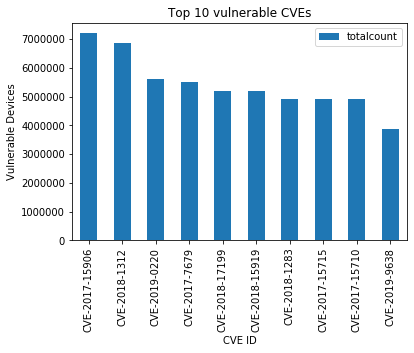

In [135]:
df_exposure.sort_values(by='totalcount', ascending=False).head(10)[['vulnerability','totalcount']].plot.bar(x='vulnerability')
plt.ylabel('Vulnerable Devices')
plt.xlabel('CVE ID')
plt.title('Top 10 vulnerable CVEs')

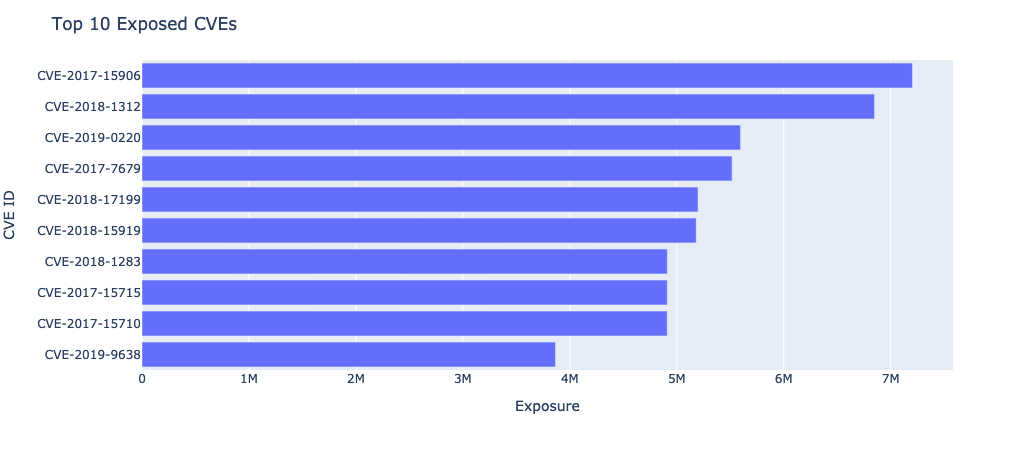

In [136]:
n = 10
top10 = df_exposure.nlargest(10, ['totalcount'])

fig = px.bar(top10, x='totalcount', y='vulnerability',
             hover_data=['vulnerability', 'totalcount'], orientation='h',
              height=500)
fig.update_layout(yaxis={'categoryorder':'total ascending'})

fig.update_layout(title='Top 10 Exposed CVEs'.format(n),
                  xaxis = dict(title='Exposure'),
                  yaxis = dict(title='CVE ID'))

fig.show()

# 3.0 CVSS
## 3.0 relates to the common vulnerability scoring system. Looking at the severity ratings and base scores of the CVEs.
### Numbers were sourced from National VUlnerability Database (NVD)

In [137]:
df_exposure=worksheet['exposure-count']

In [138]:
df_exposure[['cvss2_basescore','cvss3_basescore']].describe()

cvss3_basescore
count       315.000000
mean          7.279048
std           1.635359
min           3.100000
25%           6.100000
50%           7.500000
75%           8.800000
max          10.000000

In [139]:
df_exposure[['vulnerability','cvss2_severity','cvss3_severity']].head(5)

vulnerability cvss2_severity cvss3_severity
0  CVE-2017-1000369            LOW         MEDIUM
1  CVE-2017-1000600         MEDIUM           HIGH
2  CVE-2017-1001000         MEDIUM           HIGH
3    CVE-2017-10140         MEDIUM           HIGH
4    CVE-2017-10391           HIGH           HIGH

## 3.1 Severity Rating

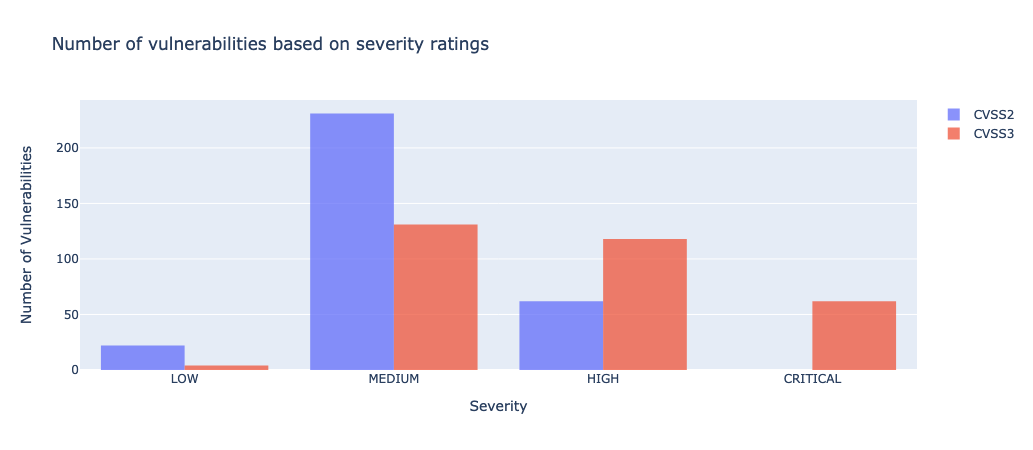

In [140]:
fig = go.Figure()
fig.add_histogram(x=df_exposure.cvss2_severity, name='CVSS2')
fig.add_histogram(x=df_exposure.cvss3_severity, name='CVSS3')

fig.update_layout(title='Number of vulnerabilities based on severity ratings',
                  xaxis = dict(title='Severity', categoryorder='array' ,categoryarray=['LOW','MEDIUM','HIGH','CRITICAL']),
                  yaxis = dict(title='Number of Vulnerabilities'))

fig.update_traces(opacity=0.75)

## 3.2 Base Scores

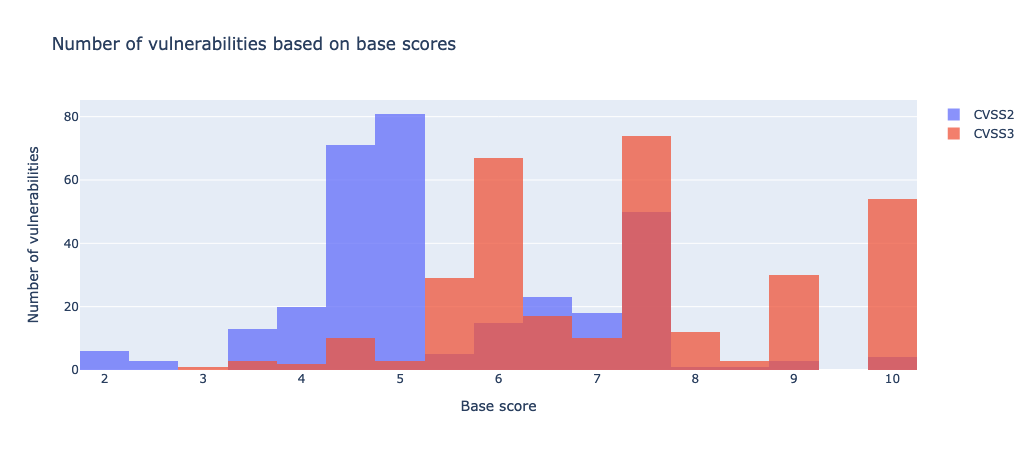

In [141]:
fig = go.Figure()
fig.add_histogram(x=df_exposure.cvss2_basescore, nbinsx=20, name='CVSS2')
fig.add_histogram(x=df_exposure.cvss3_basescore, nbinsx=20, name='CVSS3')

fig.update_layout(barmode='overlay',
                  title='Number of vulnerabilities based on base scores',
                  xaxis = dict(title='Base score'),
                  yaxis = dict(title='Number of vulnerabilities'))

fig.update_traces(opacity=0.75)

The majority of vulnerabilites have a base score between 3.8 and 7.7. This make sense as the majority of vulnerable devices are vulnerable to CVEs that a MEDIUM severity.

# 4.0 Operating Systems
## This section relates to Operating Systems. 4.1 looks at the top OSs that are the most vulnerable to our CVEs
### Numbers were sourced from Shodan.io

In [142]:
df_os=worksheet['operating-systems']
df_vulnerable_os = df_os[['operating_system','totalcount']]

In [143]:
df_vulnerable_os

operating_system  totalcount
0                                  FreeBSD 5.x         1.0
1                                  FreeBSD 8.x       905.0
2                              FreeBSD 8.x-9.x        95.0
3                                  FreeBSD 9.x      4036.0
4                                   HP-UX 11.x         4.0
..                                         ...         ...
95          Windows Vista (TM) Home Basic 6000         1.0
96                                  Windows XP       682.0
97                      Windows XP or Embedded        29.0
98     Windows Server 2003 3790 Service Pack 2         NaN
99  Windows Server 2003 R2 3790 Service Pack 2         NaN

[100 rows x 2 columns]

## 4.1 Exposed Operating Systems

Text(0.5, 1.0, 'Total number of vulnerable devices for Operating systems')

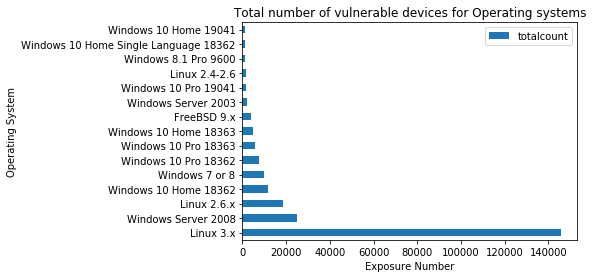

In [144]:
df_vulnerable_os.sort_values(by='totalcount', ascending=False).head(15)[['operating_system','totalcount']].plot.barh(x='operating_system')
plt.ylabel('Operating System')
plt.xlabel('Exposure Number')
plt.title('Total number of vulnerable devices for Operating systems')

These are the results from the top 20 vulnerable operating systems for each vulnerability.
I need to draw conclusions at a later date when I collect the final dataset



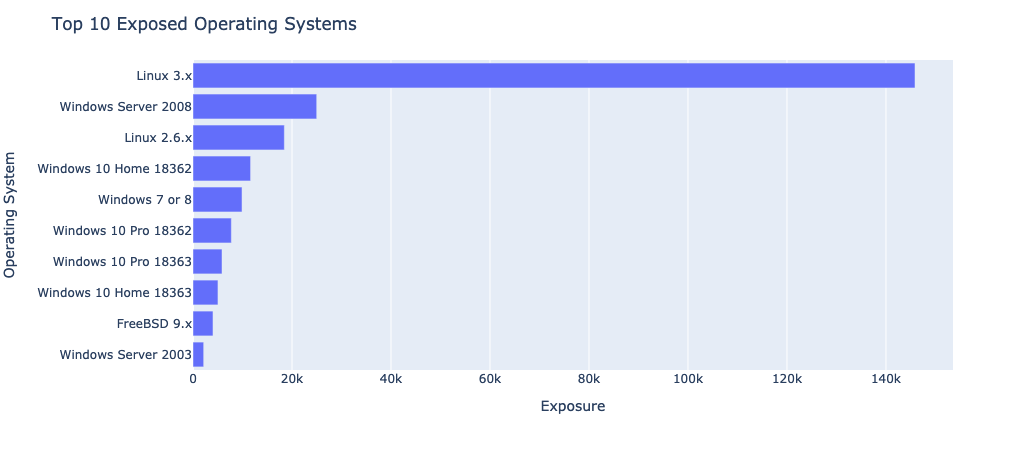

In [145]:
top10 = df_os.nlargest(10, ['totalcount'])

fig = px.bar(top10, x='totalcount', y='operating_system',
             hover_data=['operating_system', 'totalcount'], orientation='h',
              height=500)
fig.update_layout(yaxis={'categoryorder':'total ascending'})

fig.update_layout(title='Top 10 Exposed Operating Systems'.format(n),
                  xaxis = dict(title='Exposure'),
                  yaxis = dict(title='Operating System'))
fig.show()

# 5.0 Ports
## 5.0 is looking at the exposure area regarding ports. 5.1 is looking at the top most exposed ports.
### Numbers were sourced from Shodan.io

In [146]:
df_ports=worksheet['ports']
df_ports.head(5)

port  port_number capture_date  totalcount  CVE-2017-1000369  \
0  Port 4567         4567   2020-08-24    76804339                 0   
1   Port 113          113   2020-08-24    50566644                 0   
2    Port 80           80   2020-08-24    12849995                 0   
3  Port 5900         5900   2020-08-24     9757644                 3   
4   Port 888          888   2020-08-24     4434904                 0   

  CVE-2017-1000600  CVE-2017-1001000  CVE-2017-10140  CVE-2017-10391  \
0            31034              1057               0             108   
1            17740               720               0              95   
2                0                 0               0               0   
3              666                17               0             170   
4                0                 0               0               0   

   CVE-2017-11142  ...  CVE-2019-9712  CVE-2019-9713  CVE-2019-9714  \
0           52573  ...           3704            978           3922   
1           45176  ...           3605           1167           3735   
2               0  ...              0              0              0   
3            1799  ...            149             49            161   
4               0  ...              0              0              0   

   CVE-2019-9787  CVE-2020-0796  CVE-2020-11651  CVE-2020-11652  \
0          42197              0               0               0   
1          32080              0               3               3   
2              0              0               0               0   
3            842              0               0               0   
4              0              0               0               0   

   CVE-2020-1938  CVE-2020-5902  MS17-010  
0              0              0         0  
1              0            467         0  
2              0              0         0  
3              0              0         0  
4              0              0         0  

[5 rows x 320 columns]

## 5.1 Exposed Ports

Text(0.5, 1.0, 'Top Exposed Ports')

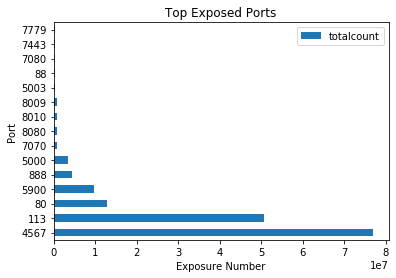

In [147]:
df_ports.sort_values(by='totalcount', ascending=False).head(15)[['port_number','totalcount']].plot.barh(x='port_number')
plt.ylabel('Port')
plt.xlabel('Exposure Number')
plt.title('Top Exposed Ports')

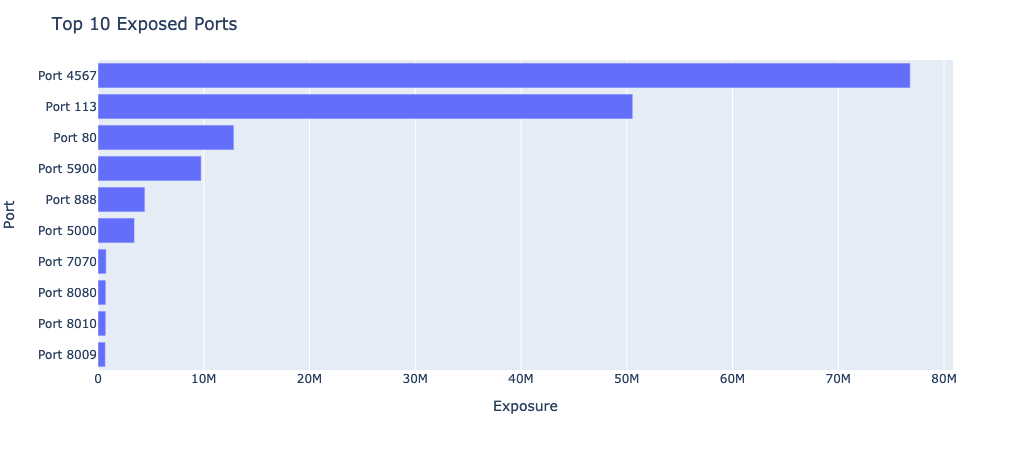

In [148]:
top10 = df_ports.nlargest(10, ['totalcount'])

fig = px.bar(top10, x='totalcount', y='port',
             hover_data=['port', 'totalcount'], orientation='h',
              height=500)

fig.update_layout(yaxis={'categoryorder':'total ascending'})

fig.update_layout(title='Top 10 Exposed Ports'.format(n),
                  xaxis = dict(title='Exposure'),
                  yaxis = dict(title='Port'))
fig.show()

# 6.0 Products & Services
## This is looking at the exposure area of products and services that are being ran on the devices that are vulnerable.
### Numbers were sourced from Shodan.io

In [149]:
df_products=worksheet['products']
df_cvss_services=worksheet['exposure-count']
df_products.head(5)

shodan_product description capture_date  totalcount  \
0                      Abyss httpd         Web   2020-08-25         177   
1                           Apache         Web   2020-08-25   109531460   
2                     Apache httpd         Web   2020-08-25      189831   
3                    Apache Tomcat         Web   2020-08-25       38555   
4  Apache Tomcat/Coyote JSP engine         Web   2020-08-25         119   

   CVE-2017-1000369  CVE-2017-1000600  CVE-2017-1001000  CVE-2017-10140  \
0                 0                 0                 0               0   
1                 0             32035              1225               0   
2                 0                 0                 0               0   
3                 0                 0                 0               0   
4                 0                 0                 0               0   

   CVE-2017-10391  CVE-2017-11142  ...  CVE-2019-9712  CVE-2019-9713  \
0               0               0  ...              0              0   
1               0           53642  ...           5358           1629   
2               0               5  ...              0              0   
3               0               0  ...              0              0   
4               0               0  ...              0              0   

   CVE-2019-9714  CVE-2019-9787  CVE-2020-0796  CVE-2020-11651  \
0              0              0              0               0   
1           5624              0              0               0   
2              0          48626              0               0   
3              0              0              0               0   
4              0             34              0               0   

   CVE-2020-11652  CVE-2020-1938  CVE-2020-5902  MS17-010  
0               0              0              0         0  
1               0              0            591         0  
2               0              0              0         0  
3               0          32394              0         0  
4               0              0              0         0  

[5 rows x 320 columns]

## 6.1 Exposed Products & Services

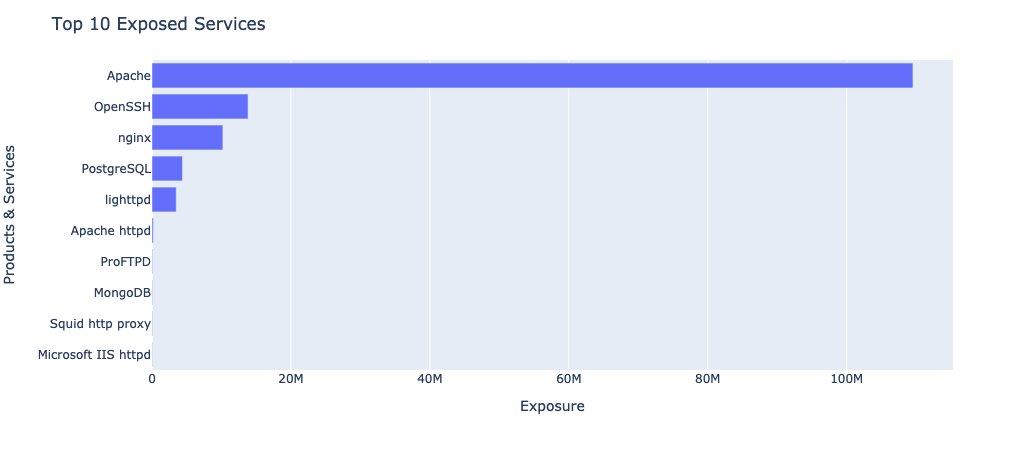

In [150]:
top10 = df_products.nlargest(10, ['totalcount'])

fig = px.bar(top10, x='totalcount', y='shodan_product',
             hover_data=['shodan_product', 'totalcount'], orientation='h',
              height=500)

fig.update_layout(yaxis={'categoryorder':'total ascending'})

fig.update_layout(title='Top 10 Exposed Services'.format(n),
                  xaxis = dict(title='Exposure'),
                  yaxis = dict(title='Products & Services'))
fig.show()

## 6.2 CVSS (Services)

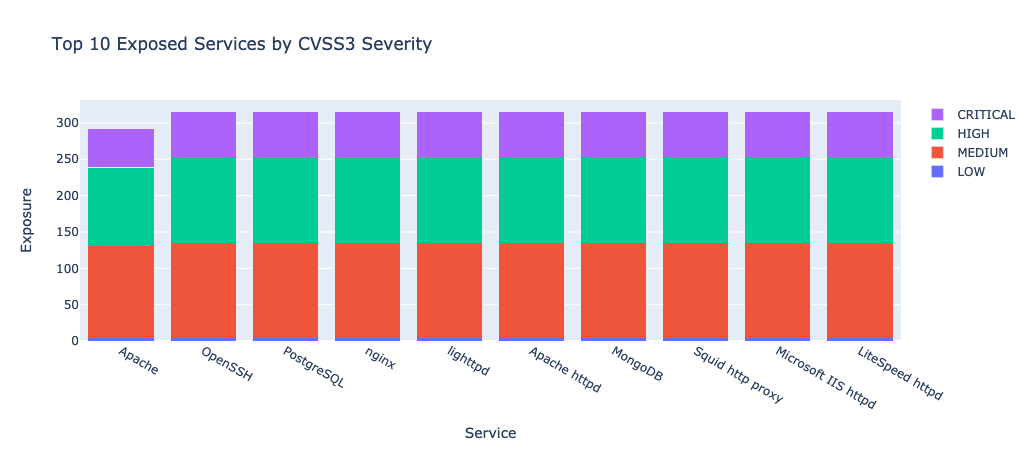

In [151]:
df_cvss_services=df_cvss_services=worksheet['exposure-count'].copy()[['vulnerability','cvss3_basescore','vulnerable_services', 'cvss3_severity']]
df_severity_services = util.tidy_split(df_cvss_services, 'vulnerable_services', sep=',')
df_severity_services['vulnerable_services']=df_severity_services['vulnerable_services'].str.strip()
service_vectors = ["Apache","OpenSSH","PostgreSQL","nginx","lighttpd","Apache httpd","MongoDB","Squid http proxy","Microsoft IIS httpd","LiteSpeed httpd"]

fig = go.Figure(data=[
    go.Bar(name='LOW', x=service_vectors, y=df_severity_services[df_severity_services.cvss3_severity == 'LOW']['vulnerable_services'].str.strip().value_counts()[service_vectors]),
    go.Bar(name='MEDIUM', x=service_vectors, y=df_severity_services[df_severity_services.cvss3_severity == 'MEDIUM']['vulnerable_services'].str.strip().value_counts()[service_vectors]),
    go.Bar(name='HIGH', x=service_vectors, y=df_severity_services[df_severity_services.cvss3_severity == 'HIGH']['vulnerable_services'].str.strip().value_counts()[service_vectors]),
    go.Bar(name='CRITICAL', x=service_vectors, y=df_severity_services[df_severity_services.cvss3_severity == 'CRITICAL']['vulnerable_services'].str.strip().value_counts()[service_vectors])
])

# Change the bar mode
fig.update_layout(barmode='stack',
                  title='Top 10 Exposed Services by CVSS3 Severity',
                  xaxis = dict(title='Service'),
                  yaxis = dict(title='Exposure'))
fig.show()

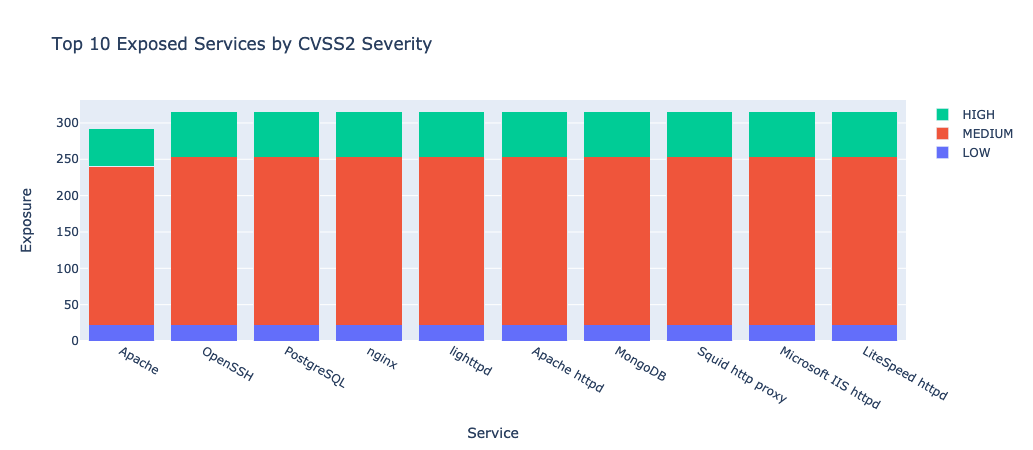

In [152]:
df_cvss_services=df_cvss_services=worksheet['exposure-count'].copy()[['vulnerability','cvss2_basescore','vulnerable_services', 'cvss2_severity']]
df_severity_services = util.tidy_split(df_cvss_services, 'vulnerable_services', sep=',')
df_severity_services['vulnerable_services']=df_severity_services['vulnerable_services'].str.strip()
service_vectors = ["Apache","OpenSSH","PostgreSQL","nginx","lighttpd","Apache httpd","MongoDB","Squid http proxy","Microsoft IIS httpd","LiteSpeed httpd"]

fig = go.Figure(data=[
    go.Bar(name='LOW', x=service_vectors, y=df_severity_services[df_severity_services.cvss2_severity == 'LOW']['vulnerable_services'].str.strip().value_counts()[service_vectors]),
    go.Bar(name='MEDIUM', x=service_vectors, y=df_severity_services[df_severity_services.cvss2_severity == 'MEDIUM']['vulnerable_services'].str.strip().value_counts()[service_vectors]),
    go.Bar(name='HIGH', x=service_vectors, y=df_severity_services[df_severity_services.cvss2_severity == 'HIGH']['vulnerable_services'].str.strip().value_counts()[service_vectors]),
])

# Change the bar mode
fig.update_layout(barmode='stack',
                  title='Top 10 Exposed Services by CVSS2 Severity',
                  xaxis = dict(title='Service'),
                  yaxis = dict(title='Exposure'))
fig.show()

In [153]:
services = util.tidy_split(df_cvss_services,column='vulnerable_services',sep=',')
services = services[services.vulnerable_services!='nan']
services

vulnerability cvss2_basescore  vulnerable_services cvss2_severity
0    CVE-2017-1000369             2.1               Apache            LOW
0    CVE-2017-1000369             2.1              OpenSSH            LOW
0    CVE-2017-1000369             2.1           PostgreSQL            LOW
0    CVE-2017-1000369             2.1                nginx            LOW
0    CVE-2017-1000369             2.1             lighttpd            LOW
..                ...             ...                  ...            ...
315          MS17-010             NaN         Apache httpd            NaN
315          MS17-010             NaN              MongoDB            NaN
315          MS17-010             NaN     Squid http proxy            NaN
315          MS17-010             NaN  Microsoft IIS httpd            NaN
315          MS17-010             NaN      LiteSpeed httpd            NaN

[3136 rows x 4 columns]

# 7.0 Tags
## Looking at the exposure regarding tags from Shodan.io
### Numbers were sourced from Shodan.io
#### Doesn't provide much information on the exposure area so potentially could be cut from project

In [154]:
df_tags=worksheet['tags']
df_tags.head(5)

shodan_tag capture_date  totalcount  CVE-2017-1000369  CVE-2017-1000600  \
0            c2   2020-08-25         128                 0                 0   
1         cloud   2020-08-25    38995190              6333              8384   
2   compromised   2020-08-25        4495                 0                18   
3      database   2020-08-25     4472098                 0                 0   
4  doublepulsar   2020-08-25           0                 0                 0   

   CVE-2017-1001000  CVE-2017-10140  CVE-2017-10391  CVE-2017-11142  \
0                 0               0               0               0   
1               549               1             138           29918   
2                 1               0               0               4   
3                 0               0               0               0   
4                 0               0               0               0   

   CVE-2017-11143  ...  CVE-2019-9712  CVE-2019-9713  CVE-2019-9714  \
0               0  ...              1              0              1   
1           11580  ...           1034            360           1062   
2               3  ...              0              0              0   
3               0  ...              0              0              0   
4               0  ...              0              0              0   

   CVE-2019-9787  CVE-2020-0796  CVE-2020-11651  CVE-2020-11652  \
0              0              0               0               0   
1          16820           2057              37              37   
2             27              0               0               0   
3              0              0               0               0   
4              0              0               0               0   

   CVE-2020-1938  CVE-2020-5902  MS17-010  
0              0              0         0  
1             37            332       656  
2              0              0         0  
3              0              0         0  
4              0              0       682  

[5 rows x 319 columns]

## 7.1 Exposed Tags

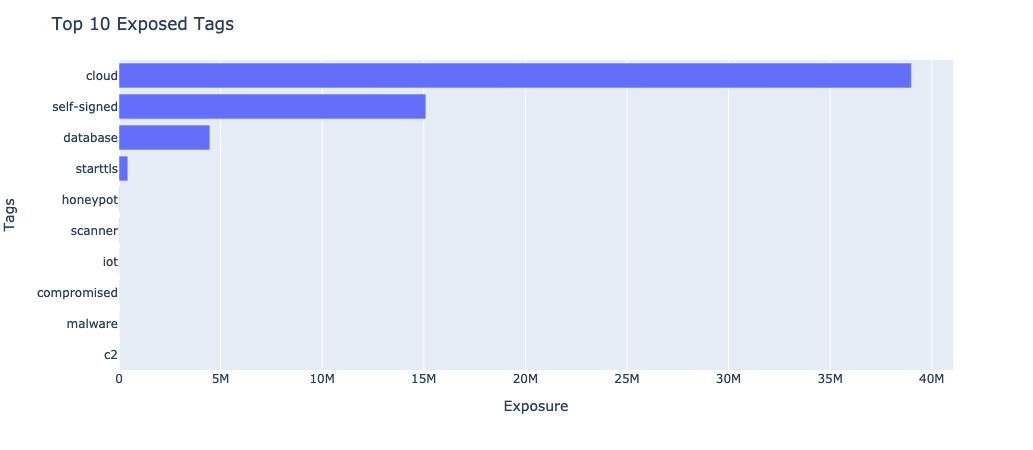

In [155]:
top10 = df_tags.nlargest(10, ['totalcount'])

fig = px.bar(top10, x='totalcount', y='shodan_tag',
             hover_data=['shodan_tag', 'totalcount'], orientation='h',
              height=500)

fig.update_layout(yaxis={'categoryorder':'total ascending'})

fig.update_layout(title='Top 10 Exposed Tags'.format(n),
                  xaxis = dict(title='Exposure'),
                  yaxis = dict(title='Tags'))
fig.show()

# 8.0 Devices
## Looking at the exposure regarding devices from Shodan.io
### Numbers were sourced from Shodan.io
#### Doesn't provide much information on the exposure area so potentially could be cut from project

In [156]:
df_devices=worksheet['devices']
df_devices.head(5)

shodan_device capture_date  totalcount  CVE-2017-1000369  \
0          firewall   2020-08-25        2261                 0   
1  broadband router   2020-08-25         276                 0   
2            webcam   2020-08-25         134                 0   
3       specialized   2020-08-25         368                 0   
4      media device   2020-08-25        4554                 0   

   CVE-2017-1000600  CVE-2017-1001000  CVE-2017-10140  CVE-2017-10391  \
0                 0                 0               0               0   
1                 0                 0               0               0   
2                 0                 0               0               0   
3                 0                 0               0               0   
4                 0                 0               0               0   

   CVE-2017-11142  CVE-2017-11143  ...  CVE-2019-9712  CVE-2019-9713  \
0               0               0  ...              0              0   
1               0               0  ...              0              0   
2               0               0  ...              0              0   
3               0               0  ...              0              0   
4               0               0  ...              0              0   

   CVE-2019-9714  CVE-2019-9787  CVE-2020-0796  CVE-2020-11651  \
0              0              0              0               0   
1              0              0              0               0   
2              0              0              0               0   
3              0              0              0               0   
4              0              0              0               0   

   CVE-2020-11652  CVE-2020-1938  CVE-2020-5902  MS17-010  
0               0              0              0         0  
1               0              0              0         0  
2               0              0              0         0  
3               0              0              0         0  
4               0              0              0         0  

[5 rows x 319 columns]

## 8.1 Exposed Devices

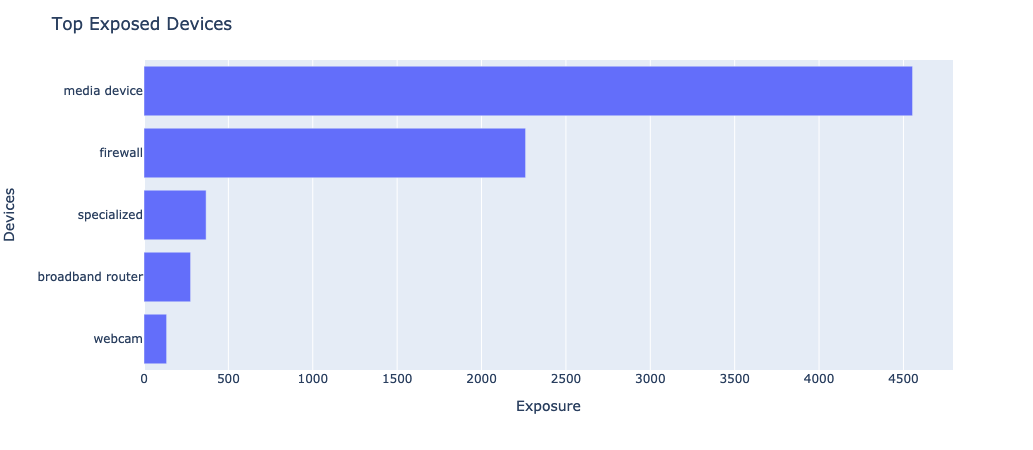

In [157]:
top10 = df_devices.nlargest(10, ['totalcount'])

fig = px.bar(top10, x='totalcount', y='shodan_device',
             hover_data=['shodan_device', 'totalcount'], orientation='h',
              height=500)

fig.update_layout(yaxis={'categoryorder':'total ascending'})

fig.update_layout(title='Top Exposed Devices'.format(n),
                  xaxis = dict(title='Exposure'),
                  yaxis = dict(title='Devices'))
fig.show()

# 9.0 Exploits
## Looking at the exploits for the common vulnerabilities.
### CVE numbers sourced from Shodan.io. Other exploit information sourced from Shodan.io, NVD, SecurityFocus and others. (Included in "exploit_source" column)

In [158]:
df_exposure

vulnerability capture_date  totalcount         exploit_source  \
0    CVE-2017-1000369   2020-10-22       82562  NVD,CVE,SecurityFocus   
1    CVE-2017-1000600   2020-10-22       50424      NVD,SecurityFocus   
2    CVE-2017-1001000   2020-10-22        1957                NVD,CVE   
3      CVE-2017-10140   2020-10-22         234                NVD,CVE   
4      CVE-2017-10391   2020-10-22         531      NVD,SecurityFocus   
..                ...          ...         ...                    ...   
311    CVE-2020-11651   2020-10-22          93                    NVD   
312    CVE-2020-11652   2020-10-22          93                    NVD   
313     CVE-2020-1938   2020-10-22       37041                    NVD   
314     CVE-2020-5902   2020-10-22         497                    NVD   
315          MS17-010   2020-10-22        9592              Shodan.io   

       exploit_type                     exploit_platform exploit_vendor  \
0             local                                 Exim           Exim   
1    remote,webapps                            Wordpress      Wordpress   
2    remote,webapps                            Wordpress      Wordpress   
3             local                              Postfix        Postfix   
4            remote              Oracle Glassfish Server         Oracle   
..              ...                                  ...            ...   
311  remote,webapps                                 Salt      Saltstack   
312  remote,webapps                                 Salt      Saltstack   
313  remote,webapps  Apache JServ Protocol,Apache Tomcat         Apache   
314          remote                               BIG-IP             f5   
315     remote, dos                                  SMB      Microsoft   

                                        exploit_attack  \
0       Arbitrary Code Execution, Privilege Escalation   
1                                       Code Execution   
2                                Write Arbitrary Files   
3                                 Privilege Escalation   
4                                  Unauthorised Access   
..                                                 ...   
311       Unauthorised Access,Arbitrary Code Execution   
312                 Unauthorised Access,Code Execution   
313  Code Execution,Information Disclosure,Arbitrar...   
314                                     Code Exeuction   
315                                     Code Execution   

                                     vulnerable_cities  \
0    Tokyo,London,Dublin,Singapore,Amsterdam,Sydney...   
1    Tokyo,London,Dublin,Singapore,Amsterdam,Sydney...   
2    Tokyo,London,Dublin,Singapore,Amsterdam,Sydney...   
3                                            Singapore   
4    London,Dublin,Singapore,Amsterdam,Sydney,Mumba...   
..                                                 ...   
311  Tokyo,London,Dublin,Singapore,Amsterdam,Sydney...   
312  Tokyo,London,Dublin,Singapore,Amsterdam,Sydney...   
313  Tokyo,London,Dublin,Singapore,Amsterdam,Sydney...   
314  Tokyo,London,Dublin,Singapore,Amsterdam,Sydney...   
315  Tokyo,London,Dublin,Singapore,Amsterdam,Sydney...   

                                   vulnerable_services  ... cvss2_basescore  \
0    Apache,OpenSSH,PostgreSQL,nginx,lighttpd,Apach...  ...             2.1   
1    Apache,OpenSSH,PostgreSQL,nginx,lighttpd,Apach...  ...             6.5   
2    Apache,OpenSSH,PostgreSQL,nginx,lighttpd,Apach...  ...             5.0   
3    Apache,OpenSSH,PostgreSQL,nginx,lighttpd,Apach...  ...             4.6   
4    Apache,OpenSSH,PostgreSQL,nginx,lighttpd,Apach...  ...             7.5   
..                                                 ...  ...             ...   
311  OpenSSH,PostgreSQL,nginx,lighttpd,Apache httpd...  ...             7.5   
312  OpenSSH,PostgreSQL,nginx,lighttpd,Apache httpd...  ...             4.0   
313  OpenSSH,PostgreSQL,nginx,lighttpd,Apache httpd...  ...             7.5   
314  OpenSSH,PostgreSQL,nginx,lighttpd,Apache 

## 9.1 Exploit Attack Types

In [159]:
exploit_info = util.tidy_split(df_exposure,column='exploit_attack',sep=',')
exploit_info=exploit_info[exploit_info['exploit_attack']!='nan']

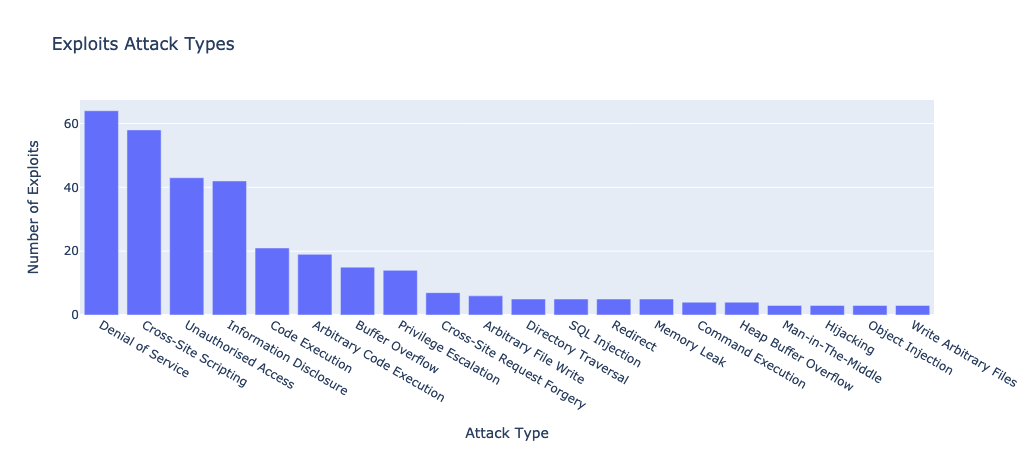

In [160]:
n = 20
exploit_info = exploit_info['exploit_attack'].value_counts().nlargest(n)

fig = go.Figure()
fig.add_bar(x=exploit_info.index, y=exploit_info.values)

fig.update_layout(title='Exploits Attack Types'.format(n),
                  xaxis = dict(title='Attack Type'),
                  yaxis = dict(title='Number of Exploits'))

## 9.2 Exploit Platforms

In [161]:
exploit_platform_info = util.tidy_split(df_exposure,column='exploit_platform',sep=',')
exploit_platform_info=exploit_platform_info[exploit_platform_info['exploit_platform']!='nan']

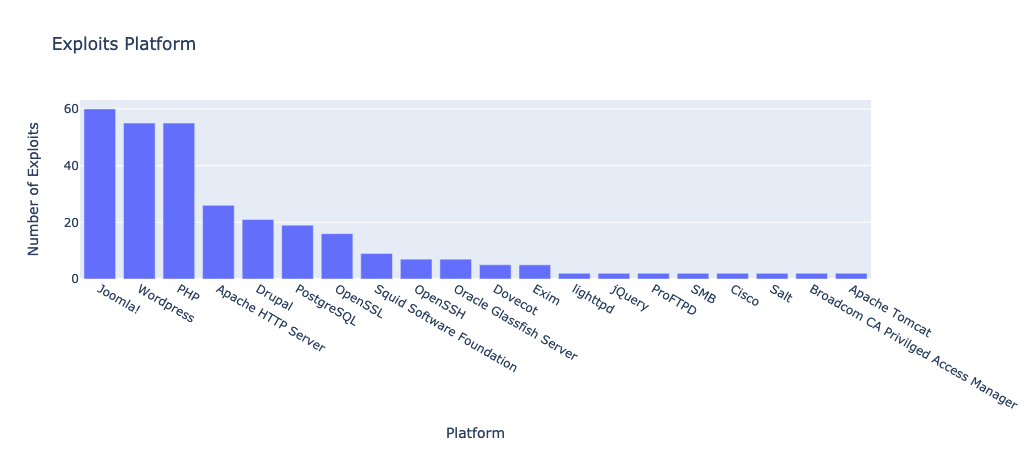

In [162]:
n = 20
exploit_platform_info = exploit_platform_info['exploit_platform'].value_counts().nlargest(n)

fig = go.Figure()
fig.add_bar(x=exploit_platform_info.index, y=exploit_platform_info.values)

fig.update_layout(title='Exploits Platform'.format(n),
                  xaxis = dict(title='Platform'),
                  yaxis = dict(title='Number of Exploits'))

## 9.3 Exploit Types

In [163]:
exploit_type = util.tidy_split(df_exposure,column='exploit_type',sep=',')
exploit_type=exploit_type[exploit_type['exploit_type']!='nan']

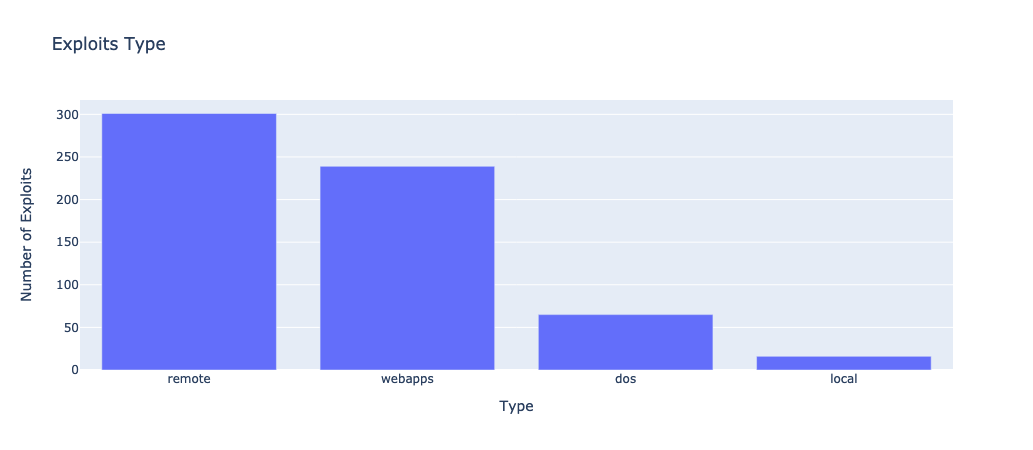

In [164]:
n = 20
exploit_type = exploit_type['exploit_type'].value_counts().nlargest(n)

fig = go.Figure()
fig.add_bar(x=exploit_type.index, y=exploit_type.values)

fig.update_layout(title='Exploits Type'.format(n),
                  xaxis = dict(title='Type'),
                  yaxis = dict(title='Number of Exploits'))

### 9.3.1 Web Exploits

In [165]:
#Retrieves the percentage of web exploits.
df_webexploits = df_exposure[df_exposure['exploit_type'].str.contains('webapps')]
print('Percentage of Web Exploits.')
df_webexploits.count()[0]/df_exposure.count()[0] *100

Percentage of Web Exploits.


75.63291139240506

#### 9.3.1.1 Web Exploit CVSS Base Scores 

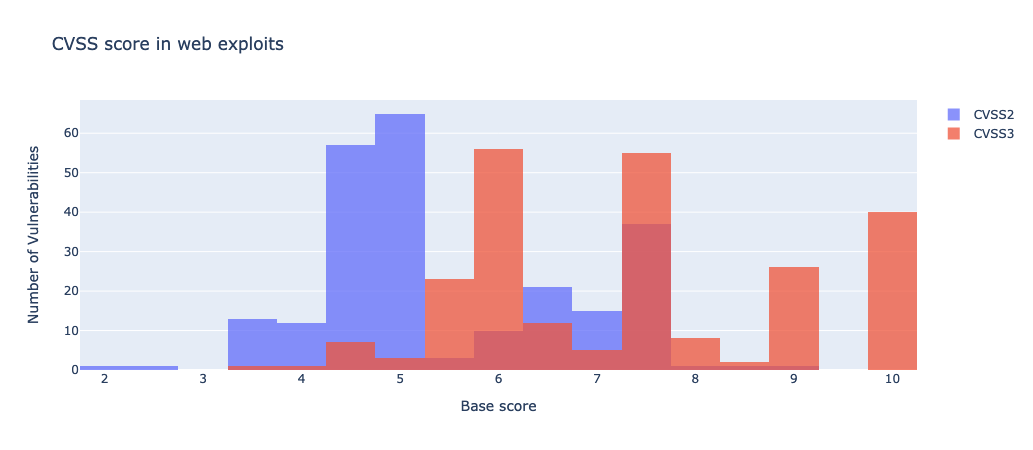

In [166]:
fig = go.Figure()
fig.add_histogram(x=df_webexploits.cvss2_basescore, nbinsx=20, name='CVSS2')
fig.add_histogram(x=df_webexploits.cvss3_basescore, nbinsx=20, name='CVSS3')

fig.update_layout(barmode='overlay',
                  title='CVSS score in web exploits',
                  xaxis = dict(title='Base score'),
                  yaxis = dict(title='Number of Vulnerabilities'))

fig.update_traces(opacity=0.75)

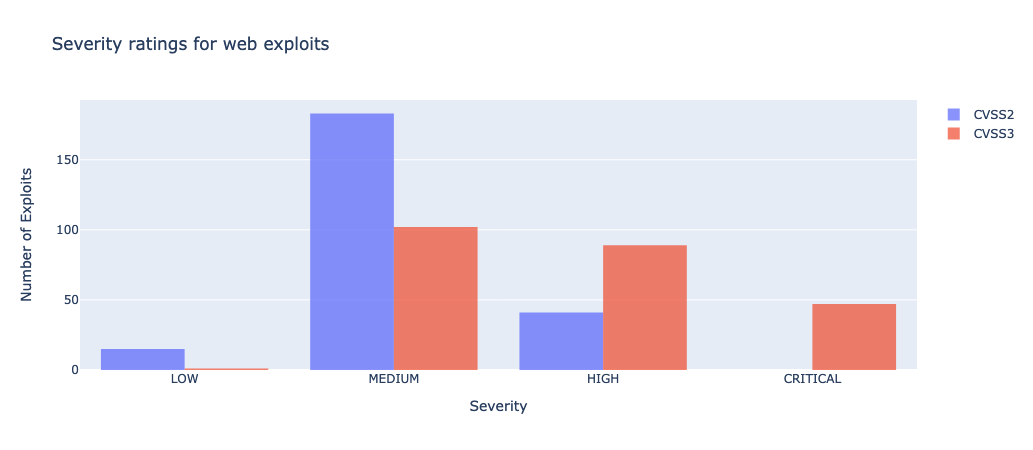

In [167]:
fig = go.Figure()
fig.add_histogram(x=df_webexploits.cvss2_severity, name='CVSS2')
fig.add_histogram(x=df_webexploits.cvss3_severity, name='CVSS3')

fig.update_layout(title='Severity ratings for web exploits',
                  xaxis = dict(title='Severity', categoryorder='array' ,categoryarray=['LOW','MEDIUM','HIGH','CRITICAL']),
                  yaxis = dict(title='Number of Exploits'))

fig.update_traces(opacity=0.75)

#### 9.3.1.2 Web Exploit Platforms

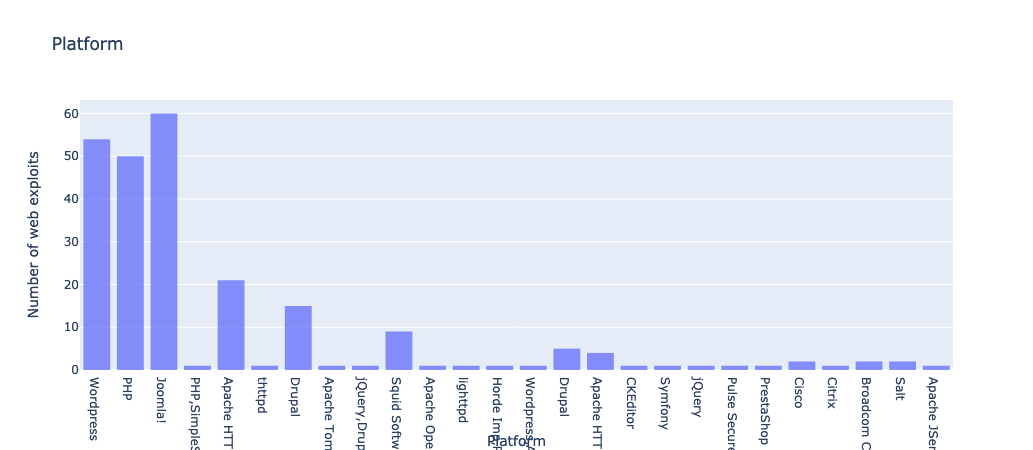

In [168]:
fig = go.Figure()
fig.add_histogram(x=df_webexploits.exploit_platform, name = 'Platform')

fig.update_layout(title='Platform',
                  xaxis = dict(title='Platform'),
                  yaxis = dict(title='Number of web exploits'))

fig.update_traces(opacity=0.75)

#### 9.3.1.3 Web Exploit Vendors

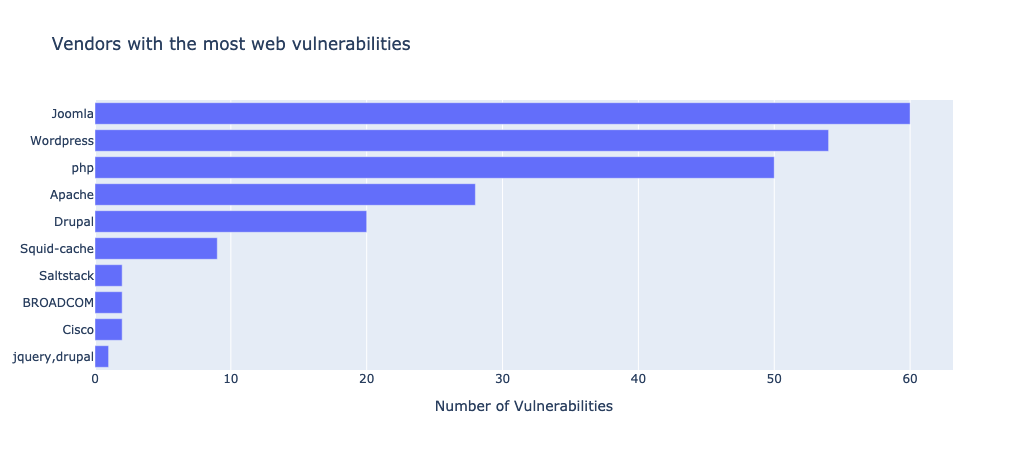

In [169]:
df_vendor = util.tidy_split(df_webexploits,column='exploit_vendor',sep=',')

df_webexploits = df_webexploits.exploit_vendor.groupby(df_webexploits.exploit_vendor).count().sort_values().tail(10)

fig = go.Figure()
fig.add_bar(x=df_webexploits.values, y=df_webexploits.index.values, orientation='h')

fig.update_layout(title='Vendors with the most web vulnerabilities',
                  xaxis = dict(title='Number of Vulnerabilities'))

### 9.3.2 Non-web Exploits

In [170]:
df_nonwebexploits = df_exposure[~df_exposure['exploit_type'].str.contains('webapps')]
print('Percentage of non-web Exploits.')
df_nonwebexploits.count()[0]/df_exposure.count()[0] *100

Percentage of non-web Exploits.


24.367088607594937

#### 9.3.2.1 Non-web Exploit CVSS Base Scores 

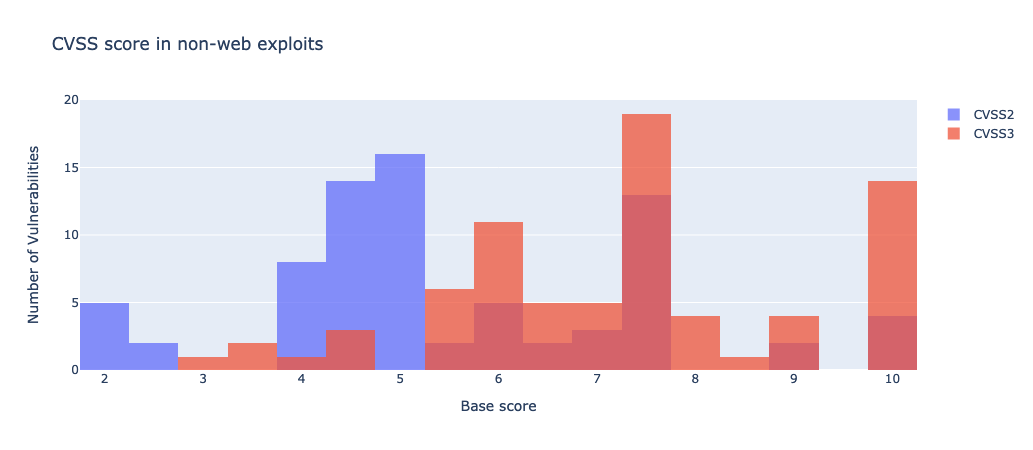

In [171]:
fig = go.Figure()
fig.add_histogram(x=df_nonwebexploits.cvss2_basescore, nbinsx=20, name='CVSS2')
fig.add_histogram(x=df_nonwebexploits.cvss3_basescore, nbinsx=20, name='CVSS3')

fig.update_layout(barmode='overlay',
                  title='CVSS score in non-web exploits',
                  xaxis = dict(title='Base score'),
                  yaxis = dict(title='Number of Vulnerabilities'))

fig.update_traces(opacity=0.75)

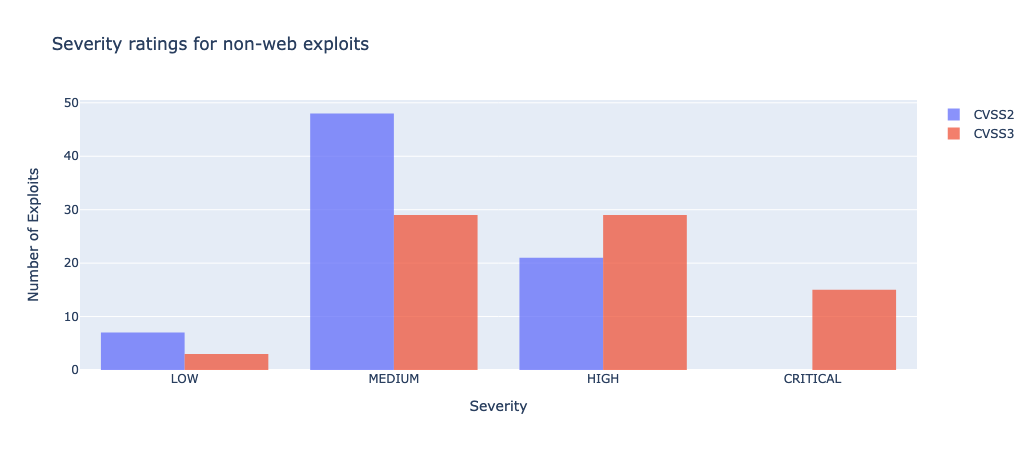

In [172]:
fig = go.Figure()
fig.add_histogram(x=df_nonwebexploits.cvss2_severity, name='CVSS2')
fig.add_histogram(x=df_nonwebexploits.cvss3_severity, name='CVSS3')

fig.update_layout(title='Severity ratings for non-web exploits',
                  xaxis = dict(title='Severity', categoryorder='array' ,categoryarray=['LOW','MEDIUM','HIGH','CRITICAL']),
                  yaxis = dict(title='Number of Exploits'))

fig.update_traces(opacity=0.75)

#### 9.3.2.2 Non-web Exploit Platforms

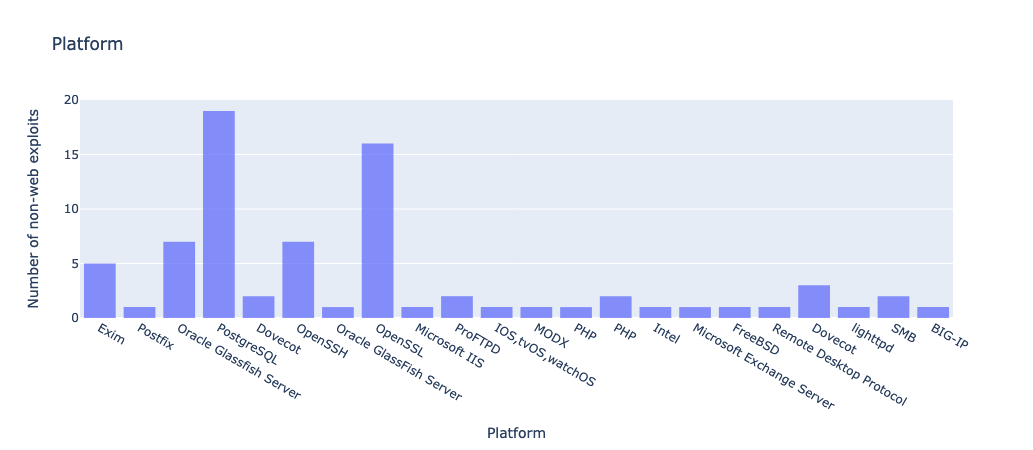

In [173]:
fig = go.Figure()
fig.add_histogram(x=df_nonwebexploits.exploit_platform, name = 'Platform')

fig.update_layout(title='Platform',
                  xaxis = dict(title='Platform'),
                  yaxis = dict(title='Number of non-web exploits'))

fig.update_traces(opacity=0.75)

#### 9.3.1.3 Non-web Exploit Vendor

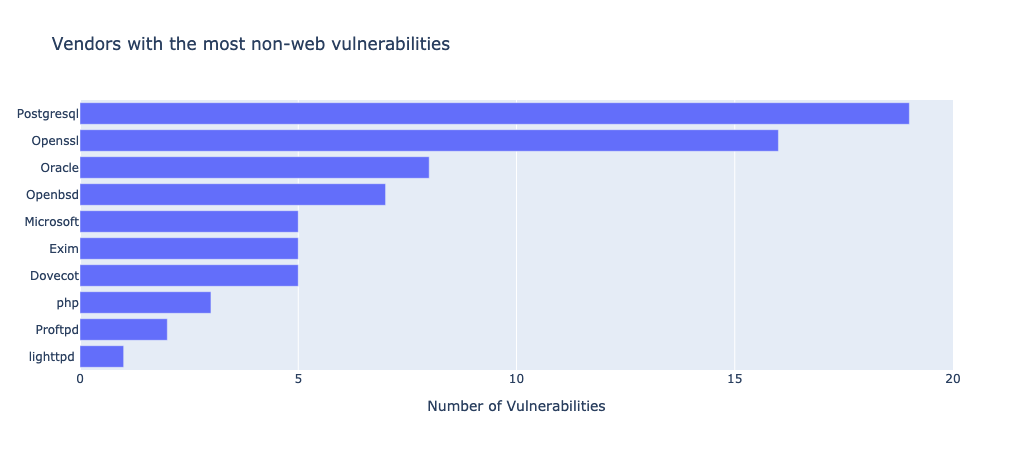

In [174]:
df_vendor = util.tidy_split(df_nonwebexploits,column='exploit_vendor',sep=',')

df_nonwebexploits = df_nonwebexploits.exploit_vendor.groupby(df_nonwebexploits.exploit_vendor).count().sort_values().tail(10)

fig = go.Figure()
fig.add_bar(x=df_nonwebexploits.values, y=df_nonwebexploits.index.values, orientation='h')

fig.update_layout(title='Vendors with the most non-web vulnerabilities',
                  xaxis = dict(title='Number of Vulnerabilities'))

### 9.3.3 Comparison Between Web and Non-web Exploits

#### 9.3.3.1 Web and Non-web Exploits Base Scores

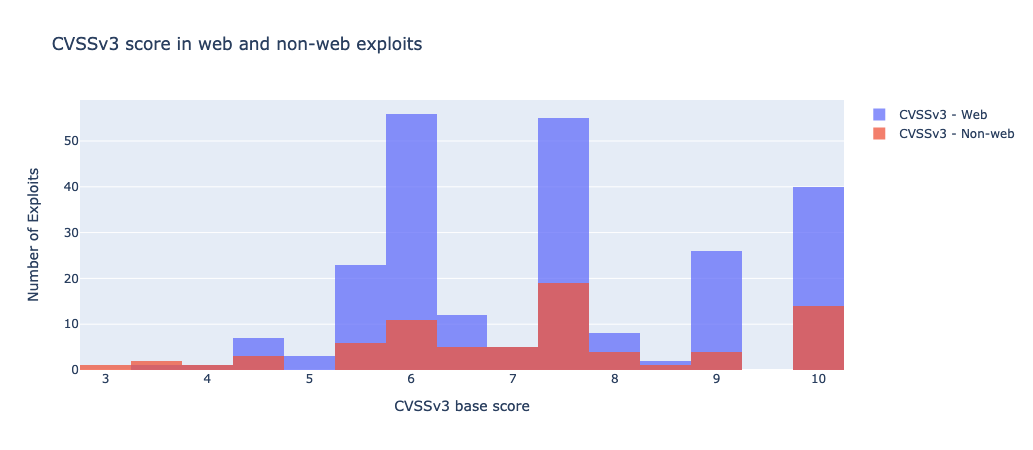

In [175]:
df_webexploits = df_exposure[df_exposure['exploit_type'].str.contains('webapps')]
df_nonwebexploits = df_exposure[~df_exposure['exploit_type'].str.contains('webapps')]
fig = go.Figure()
fig.add_histogram(x=df_webexploits.cvss3_basescore, nbinsx=20, name='CVSSv3 - Web')
fig.add_histogram(x=df_nonwebexploits.cvss3_basescore, nbinsx=20, name='CVSSv3 - Non-web')

fig.update_layout(barmode='overlay',
                  title='CVSSv3 score in web and non-web exploits',
                  xaxis = dict(title='CVSSv3 base score'),
                  yaxis = dict(title='Number of Exploits'))

fig.update_traces(opacity=0.75)

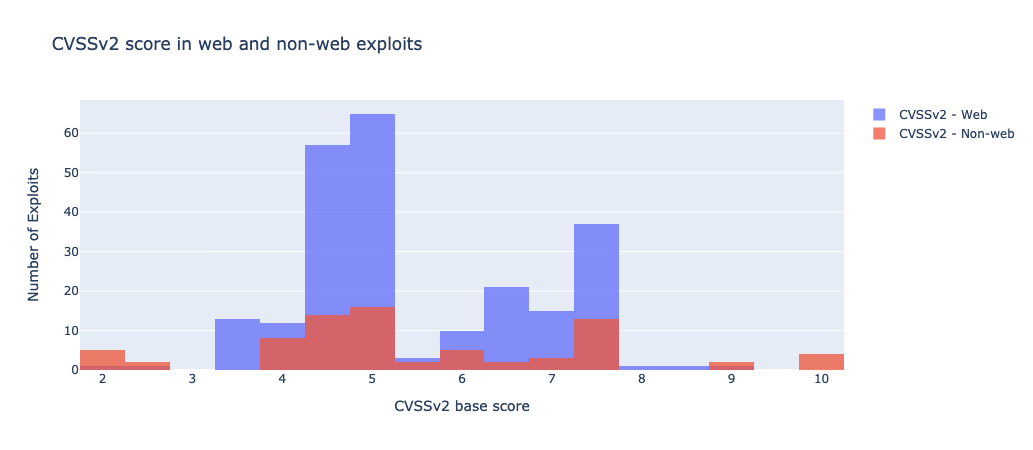

In [176]:
df_webexploits = df_exposure[df_exposure['exploit_type'].str.contains('webapps')]
df_nonwebexploits = df_exposure[~df_exposure['exploit_type'].str.contains('webapps')]
fig = go.Figure()
fig.add_histogram(x=df_webexploits.cvss2_basescore, nbinsx=20, name='CVSSv2 - Web')
fig.add_histogram(x=df_nonwebexploits.cvss2_basescore, nbinsx=20, name='CVSSv2 - Non-web')

fig.update_layout(barmode='overlay',
                  title='CVSSv2 score in web and non-web exploits',
                  xaxis = dict(title='CVSSv2 base score'),
                  yaxis = dict(title='Number of Exploits'))

fig.update_traces(opacity=0.75)

#### 9.3.3.2 Web and Non-web Exploits Severity Rating

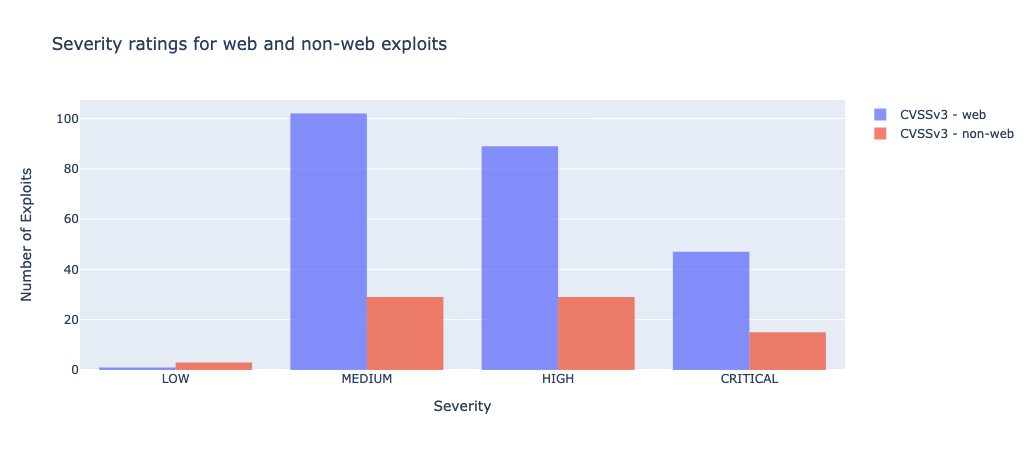

In [177]:
fig = go.Figure()
fig.add_histogram(x=df_webexploits.cvss3_severity, name='CVSSv3 - web')
fig.add_histogram(x=df_nonwebexploits.cvss3_severity, name='CVSSv3 - non-web')

fig.update_layout(title='Severity ratings for web and non-web exploits',
                  xaxis = dict(title='Severity', categoryorder='array' ,categoryarray=['LOW','MEDIUM','HIGH','CRITICAL']),
                  yaxis = dict(title='Number of Exploits'))

fig.update_traces(opacity=0.75)

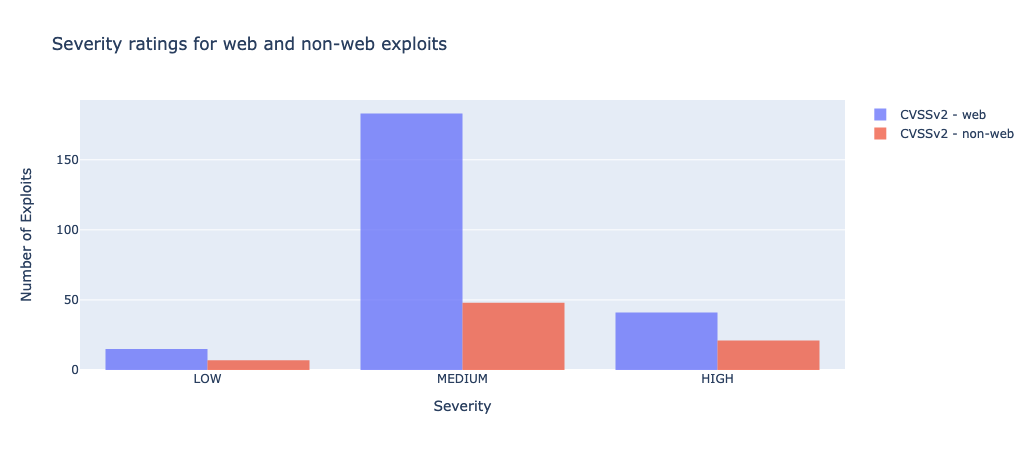

In [178]:
fig = go.Figure()
fig.add_histogram(x=df_webexploits.cvss2_severity, name='CVSSv2 - web')
fig.add_histogram(x=df_nonwebexploits.cvss2_severity, name='CVSSv2 - non-web')

fig.update_layout(title='Severity ratings for web and non-web exploits',
                  xaxis = dict(title='Severity', categoryorder='array' ,categoryarray=['LOW','MEDIUM','HIGH']),
                  yaxis = dict(title='Number of Exploits'))

fig.update_traces(opacity=0.75)

# 10.0 Cities

## 10.1 Smart Cities

In [179]:
df_smartcitys=worksheet['smart-cities'] 
df_smartcitys

smart_city  population_2020        population_source  overall_rating  \
0             Tokyo         37393128  World Population Review               5   
1            London          9304016  World Population Review               7   
2            Dublin          1228179  World Population Review               7   
3         Singapore          5935053  World Population Review              10   
4         Amsterdam          1148972  World Population Review               8   
..              ...              ...                      ...             ...   
97     Kuala Lumpur          7996830  World Population Review               4   
98      Mexico City         21782378  World Population Review               3   
99   St. Petersburg          5467808  World Population Review               4   
100        Tel Aviv          4181479  World Population Review               6   
101       The Hague           697564  World Population Review               7   

     overall_ranking capture_date  totalcount  CVE-2017-1000369  \
0                 62   2020-02-08     2854882                71   
1                 20   2020-02-08     2808970              1192   
2                 30   2020-02-08     2358118                52   
3                  1   2020-02-08     1997152               883   
4                 11   2020-02-08     1642976               875   
..               ...          ...         ...               ...   
97                70   2020-02-08           0                 0   
98                88   2020-02-08           0                 0   
99                73   2020-02-08           0                 0   
100               46   2020-02-08           0                 0   
101               29   2020-02-08           0                 0   

     CVE-2017-1000600  CVE-2017-1001000  ...  CVE-2019-9712  CVE-2019-9713  \
0                 787                75  ...              0              0   
1                 507                29  ...              1              1   
2                 495                26  ...              1              1   
3                 380                19  ...              0              0   
4                 468                19  ...              1              0   
..                ...               ...  ...            ...            ...   
97                  0                 0  ...              0              0   
98                  0                 0  ...              0              0   
99                  0                 0  ...              0              0   
100                 0                 0  ...              0              0   
101                 0                 0  ...              0              0   

     CVE-2019-9714  CVE-2019-9787  CVE-2020-0796  CVE-2020-11651  \
0                0           1542            571               1   
1                1           1107            202               2   
2                1            903            114               4   
3                0            782            327               2   
4                1            846            302               2   
..             ...            ...            ...             ...   
97               0              0              0               0   
98               0              0              0               0   
99               0              0              0               0   
100              0              0              0               0   
101              0              0              0               0   

     CVE-2020-11652  CVE-2020-1938  CVE-2020-5902  MS17-010  
0                 1            181              7        37  
1                 2            267              3       147  
2                 4            111              4        26  
3                 2            229             10        40  
4                 2            174             20        15  
..              ...            ...            ...       ...  
97                0              0         

### 10.1.1 Exposed Smart Cities

Text(0.5, 1.0, 'Top 10 Vulnerable Smart Cities')

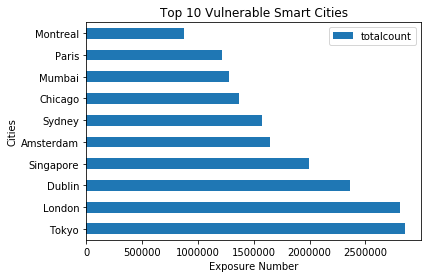

In [180]:
df_smartcitys.sort_values(by='totalcount', ascending=False).head(10)[['smart_city','totalcount']].plot.barh(x='smart_city')
plt.ylabel('Cities')
plt.xlabel('Exposure Number')
plt.title('Top 10 Vulnerable Smart Cities')

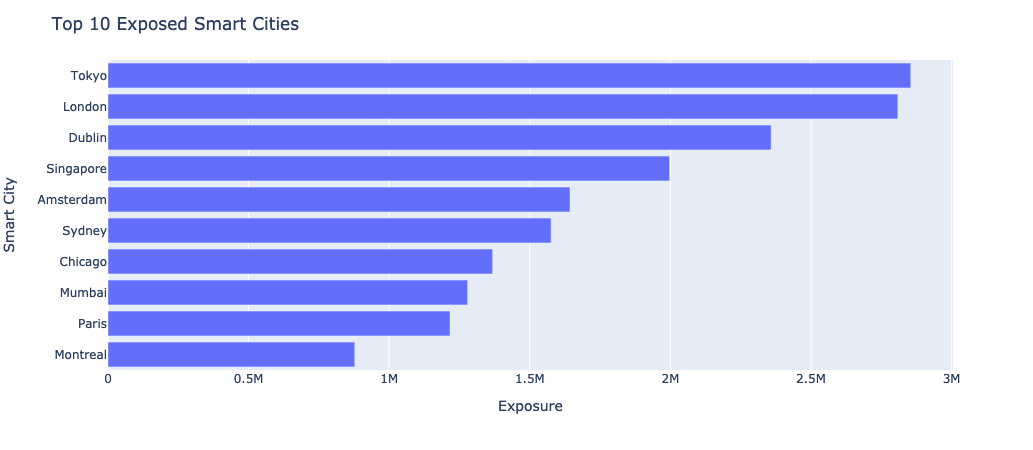

In [181]:
top10 = df_smartcitys.nlargest(10, ['totalcount'])

fig = px.bar(top10, x='totalcount', y='smart_city',
             hover_data=['smart_city', 'totalcount'], orientation='h',
              height=500)
fig.update_layout(yaxis={'categoryorder':'total ascending'})

fig.update_layout(title='Top 10 Exposed Smart Cities'.format(n),
                  xaxis = dict(title='Exposure'),
                  yaxis = dict(title='Smart City'))

fig.show()

### 10.1.2 Smart Cities Ratings

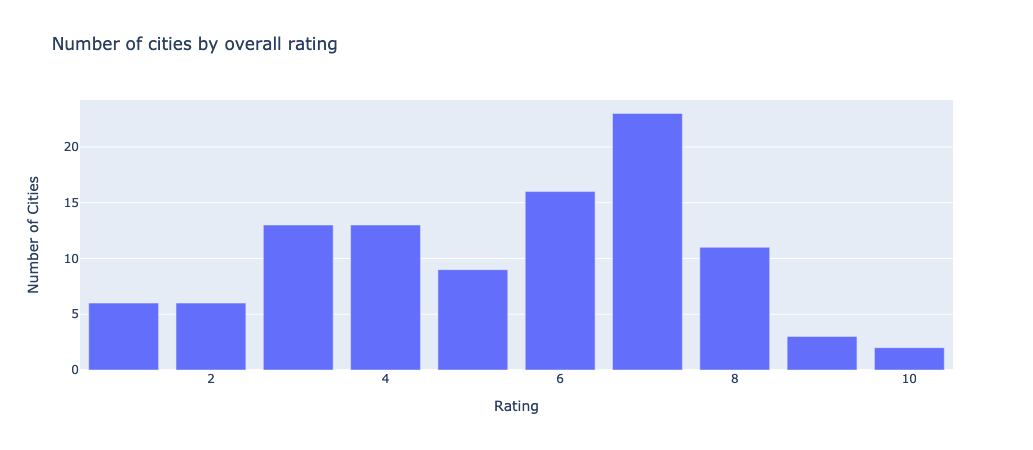

In [182]:
df_ratings=df_smartcitys[['smart_city','overall_rating','totalcount']]

df_ratings = df_ratings['overall_rating'].value_counts()

fig = go.Figure()
fig.add_bar(x=df_ratings.index, y=df_ratings.values)

fig.update_layout(title='Number of cities by overall rating',
                  xaxis = dict(title='Rating'),
                  yaxis = dict(title='Number of Cities'))

AAA = 10, AA = 9, A = 8, BBB = 7, BB = 6, B = 5, CCC = 4, CC = 3, C = 2, D =1

In [183]:
#A little bit messy but it gets the job done. Maybe we could implement a loop?
df_10 = df_smartcitys.loc[df_smartcitys['overall_rating'] == 10]
df_9 = df_smartcitys.loc[df_smartcitys['overall_rating'] == 9]
df_8 = df_smartcitys.loc[df_smartcitys['overall_rating'] == 8]
df_7 = df_smartcitys.loc[df_smartcitys['overall_rating'] == 7]
df_6 = df_smartcitys.loc[df_smartcitys['overall_rating'] == 6]
df_5 = df_smartcitys.loc[df_smartcitys['overall_rating'] == 5]
df_4 = df_smartcitys.loc[df_smartcitys['overall_rating'] == 4]
df_3 = df_smartcitys.loc[df_smartcitys['overall_rating'] == 3]
df_2 = df_smartcitys.loc[df_smartcitys['overall_rating'] == 2]
df_1 = df_smartcitys.loc[df_smartcitys['overall_rating'] == 1]
df_10

smart_city  population_2020        population_source  overall_rating  \
3   Singapore          5935053  World Population Review              10   
28     Zurich          1395356  World Population Review              10   

    overall_ranking capture_date  totalcount  CVE-2017-1000369  \
3                 1   2020-02-08     1997152               883   
28                2   2020-02-08      204065                26   

    CVE-2017-1000600  CVE-2017-1001000  ...  CVE-2019-9712  CVE-2019-9713  \
3                380                19  ...              0              0   
28                13                 1  ...              0              0   

    CVE-2019-9714  CVE-2019-9787  CVE-2020-0796  CVE-2020-11651  \
3               0            782            327               2   
28              0             24             40               0   

    CVE-2020-11652  CVE-2020-1938  CVE-2020-5902  MS17-010  
3                2            229             10        40  
28               0             12              0         3  

[2 rows x 323 columns]

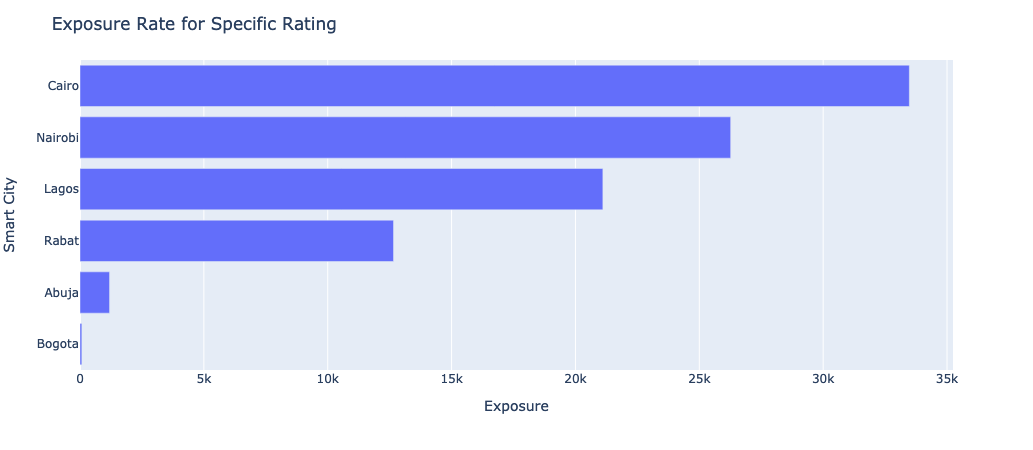

In [184]:
fig = px.bar(df_1, x='totalcount', y='smart_city', #Just change the "df_x"
             hover_data=['smart_city', 'totalcount'], orientation='h',
              height=500)
fig.update_layout(yaxis={'categoryorder':'total ascending'})

fig.update_layout(title='Exposure Rate for Specific Rating',
                  xaxis = dict(title='Exposure'),
                  yaxis = dict(title='Smart City'))

fig.show()

### 10.1.3 CVSS (Smart Cities)

In [185]:
df_cvss_city=worksheet['exposure-count'] 
df_cvss_city

vulnerability capture_date  totalcount         exploit_source  \
0    CVE-2017-1000369   2020-10-22       82562  NVD,CVE,SecurityFocus   
1    CVE-2017-1000600   2020-10-22       50424      NVD,SecurityFocus   
2    CVE-2017-1001000   2020-10-22        1957                NVD,CVE   
3      CVE-2017-10140   2020-10-22         234                NVD,CVE   
4      CVE-2017-10391   2020-10-22         531      NVD,SecurityFocus   
..                ...          ...         ...                    ...   
311    CVE-2020-11651   2020-10-22          93                    NVD   
312    CVE-2020-11652   2020-10-22          93                    NVD   
313     CVE-2020-1938   2020-10-22       37041                    NVD   
314     CVE-2020-5902   2020-10-22         497                    NVD   
315          MS17-010   2020-10-22        9592              Shodan.io   

       exploit_type                     exploit_platform exploit_vendor  \
0             local                                 Exim           Exim   
1    remote,webapps                            Wordpress      Wordpress   
2    remote,webapps                            Wordpress      Wordpress   
3             local                              Postfix        Postfix   
4            remote              Oracle Glassfish Server         Oracle   
..              ...                                  ...            ...   
311  remote,webapps                                 Salt      Saltstack   
312  remote,webapps                                 Salt      Saltstack   
313  remote,webapps  Apache JServ Protocol,Apache Tomcat         Apache   
314          remote                               BIG-IP             f5   
315     remote, dos                                  SMB      Microsoft   

                                        exploit_attack  \
0       Arbitrary Code Execution, Privilege Escalation   
1                                       Code Execution   
2                                Write Arbitrary Files   
3                                 Privilege Escalation   
4                                  Unauthorised Access   
..                                                 ...   
311       Unauthorised Access,Arbitrary Code Execution   
312                 Unauthorised Access,Code Execution   
313  Code Execution,Information Disclosure,Arbitrar...   
314                                     Code Exeuction   
315                                     Code Execution   

                                     vulnerable_cities  \
0    Tokyo,London,Dublin,Singapore,Amsterdam,Sydney...   
1    Tokyo,London,Dublin,Singapore,Amsterdam,Sydney...   
2    Tokyo,London,Dublin,Singapore,Amsterdam,Sydney...   
3                                            Singapore   
4    London,Dublin,Singapore,Amsterdam,Sydney,Mumba...   
..                                                 ...   
311  Tokyo,London,Dublin,Singapore,Amsterdam,Sydney...   
312  Tokyo,London,Dublin,Singapore,Amsterdam,Sydney...   
313  Tokyo,London,Dublin,Singapore,Amsterdam,Sydney...   
314  Tokyo,London,Dublin,Singapore,Amsterdam,Sydney...   
315  Tokyo,London,Dublin,Singapore,Amsterdam,Sydney...   

                                   vulnerable_services  ... cvss2_basescore  \
0    Apache,OpenSSH,PostgreSQL,nginx,lighttpd,Apach...  ...             2.1   
1    Apache,OpenSSH,PostgreSQL,nginx,lighttpd,Apach...  ...             6.5   
2    Apache,OpenSSH,PostgreSQL,nginx,lighttpd,Apach...  ...             5.0   
3    Apache,OpenSSH,PostgreSQL,nginx,lighttpd,Apach...  ...             4.6   
4    Apache,OpenSSH,PostgreSQL,nginx,lighttpd,Apach...  ...             7.5   
..                                                 ...  ...             ...   
311  OpenSSH,PostgreSQL,nginx,lighttpd,Apache httpd...  ...             7.5   
312  OpenSSH,PostgreSQL,nginx,lighttpd,Apache httpd...  ...             4.0   
313  OpenSSH,PostgreSQL,nginx,lighttpd,Apache httpd...  ...             7.5   
314  OpenSSH,PostgreSQL,nginx,lighttpd,Apache 

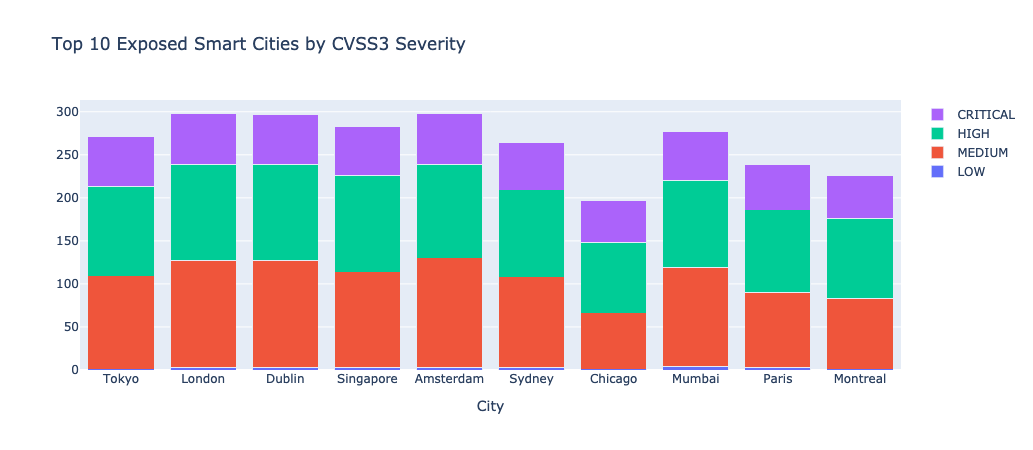

In [188]:
df_cvss3_city=df_cvss_city=worksheet['exposure-count'].copy()[['vulnerability','cvss3_basescore','vulnerable_cities', 'cvss3_severity']]
df_severity_cities = util.tidy_split(df_cvss3_city, 'vulnerable_cities', sep=',')
df_severity_cities['vulnerable_cities']=df_severity_cities['vulnerable_cities'].str.strip()
city_vectors = ["Tokyo","London","Dublin","Singapore","Amsterdam","Sydney","Chicago","Mumbai","Paris","Montreal"]

fig = go.Figure(data=[
    go.Bar(name='LOW', x=city_vectors, y=df_severity_cities[df_severity_cities.cvss3_severity == 'LOW']['vulnerable_cities'].str.strip().value_counts()[city_vectors]),
    go.Bar(name='MEDIUM', x=city_vectors, y=df_severity_cities[df_severity_cities.cvss3_severity == 'MEDIUM']['vulnerable_cities'].str.strip().value_counts()[city_vectors]),
    go.Bar(name='HIGH', x=city_vectors, y=df_severity_cities[df_severity_cities.cvss3_severity == 'HIGH']['vulnerable_cities'].str.strip().value_counts()[city_vectors]),
    go.Bar(name='CRITICAL', x=city_vectors, y=df_severity_cities[df_severity_cities.cvss3_severity == 'CRITICAL']['vulnerable_cities'].str.strip().value_counts()[city_vectors])
])

# Change the bar mode
fig.update_layout(barmode='stack',
                  title='Top 10 Exposed Smart Cities by CVSS3 Severity',
                  xaxis = dict(title='City'),
                  yaxis = dict(title=''))
fig.show()

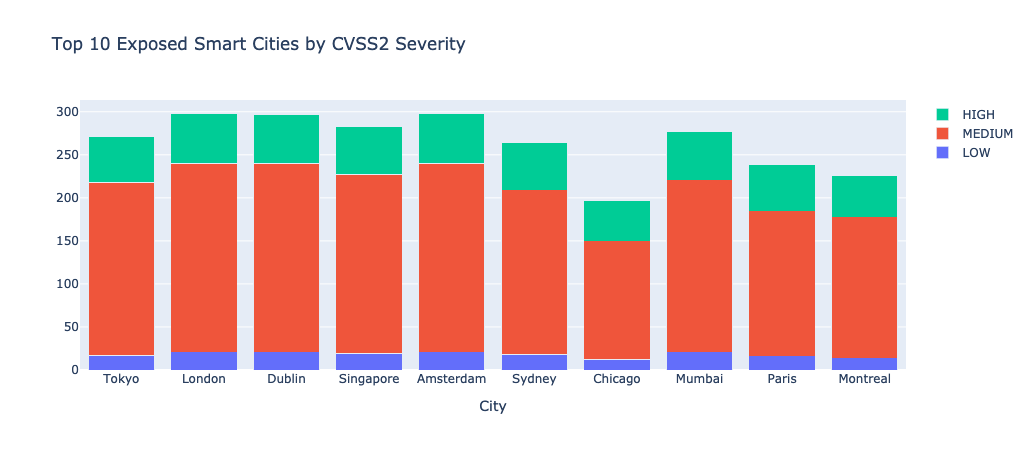

In [189]:
df_cvss2_city=df_cvss_city=worksheet['exposure-count'].copy()[['vulnerability','cvss2_basescore','vulnerable_cities', 'cvss2_severity']]
df_severity_cities = util.tidy_split(df_cvss2_city, 'vulnerable_cities', sep=',')
df_severity_cities['vulnerable_cities']=df_severity_cities['vulnerable_cities'].str.strip()

fig = go.Figure(data=[
    go.Bar(name='LOW', x=city_vectors, y=df_severity_cities[df_severity_cities.cvss2_severity == 'LOW']['vulnerable_cities'].str.strip().value_counts()[city_vectors]),
    go.Bar(name='MEDIUM', x=city_vectors, y=df_severity_cities[df_severity_cities.cvss2_severity == 'MEDIUM']['vulnerable_cities'].str.strip().value_counts()[city_vectors]),
    go.Bar(name='HIGH', x=city_vectors, y=df_severity_cities[df_severity_cities.cvss2_severity == 'HIGH']['vulnerable_cities'].str.strip().value_counts()[city_vectors]),
])

# Change the bar mode
fig.update_layout(barmode='stack',
                  title='Top 10 Exposed Smart Cities by CVSS2 Severity',
                  xaxis = dict(title='City'),
                  yaxis = dict(title=''))
fig.show()

Run smart cities script and grab the top 10 vulnerable cities then check said cities against each vulnerabilitiy 

## 10.2 Cities

In [190]:
df_city

city  population_2020        population_source capture_date  \
2     Amsterdam        1148972.0  World Population Review   2020-02-08   
5        Athens        3153355.0  World Population Review   2020-02-08   
9     Baltimore         590479.0  World Population Review   2020-02-08   
11      Bangkok       10539415.0  World Population Review   2020-02-08   
14      Beijing       20462610.0  World Population Review   2020-02-08   
..          ...              ...                      ...          ...   
226       Turin        1792163.0  World Population Review   2020-02-08   
228   Vancouver        2581079.0  World Population Review   2020-02-08   
231      Vienna        1929944.0  World Population Review   2020-02-08   
234      Warsaw        1783251.0  World Population Review   2020-02-08   
235  Washington         720687.0  World Population Review   2020-02-08   

     totalcount  CVE-2017-1000369  CVE-2017-1000600  CVE-2017-1001000  \
2        888065               563                10                 0   
5         73769                 0                 0                 0   
9         39724                 0                 0                 0   
11        61436                 0                 0                 0   
14        64727                 0                 0                 0   
..          ...               ...               ...               ...   
226       31164                 0                 0                 0   
228       15988                 0                 0                 0   
231       18448                 0                 0                 0   
234       94646                 0                 0                 0   
235       30904                 0                 0                 0   

     CVE-2017-10140  CVE-2017-10391  ...  CVE-2020-11651  CVE-2020-11652  \
2               139              76  ...              54              19   
5                 0               0  ...               0               3   
9                 0               0  ...             100              10   
11                0               0  ...               4              19   
14                0               0  ...              26               4   
..              ...             ...  ...             ...             ...   
226               0               0  ...             100              10   
228               0               0  ...               2               1   
231               0               0  ...               0               8   
234               0               0  ...               0               4   
235               0               0  ...             100              10   

     CVE-2020-1938  CVE-2020-5902  MS17-010  cim  totalcount_log  technology  \
2              136             54        19  NaN        5.948445         3.0   
5               11              0         3  NaN        4.867874        40.0   
9               27            100        10  NaN        4.599053        86.0   
11              59              4        19  NaN        4.788423        59.0   
14             358             26         4  NaN        4.811085        57.0   
..             ...            ...       ...  ...             ...         ...   
226             27            100        10  NaN        4.493653       111.0   
228              4              2         1  NaN        4.203794        44.0   
231              7              0         8  NaN        4.265949        23.0   
234             15              0         4  NaN        4.976102       114.0   
235             27            100        10  NaN        4.490015        32.0   

     economy    x  
2         36    6  
5        135   52  
9         33  105  
11        77    7  
14        50   12  
..       ...  ...  
226      101  124  
228       42   43  
231       72    8  
234      108   30  
235       11   49  

[72 rows x 326 columns]

## 10.2.1 Exposed Cities

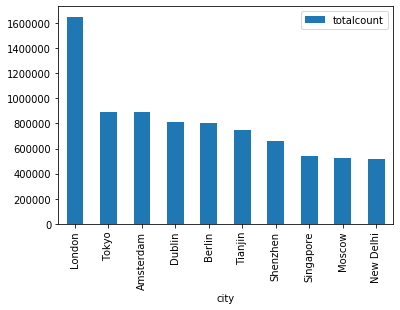

In [191]:
df_city.sort_values(by='totalcount', ascending=False).head(10)[['city','totalcount']].plot.bar(x='city')

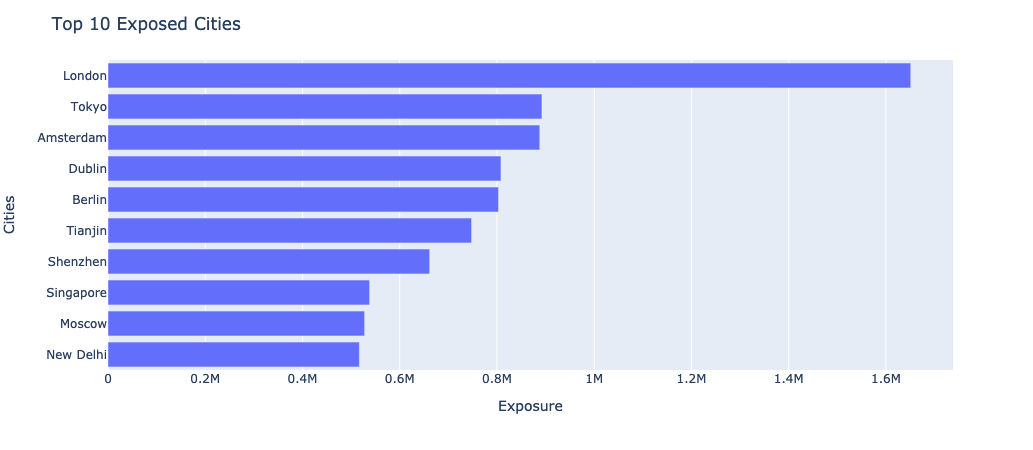

In [192]:
top10 = df_city.nlargest(10, ['totalcount'])

fig = px.bar(top10, x='totalcount', y='city',
             hover_data=['city', 'totalcount'], orientation='h',
              height=500)
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.update_layout(title='Top 10 Exposed Cities',
                  xaxis = dict(title='Exposure'),
                  yaxis = dict(title='Cities'))
fig.show()

# 11.0 Countries


In [193]:
df_country=worksheet['countries']

## 11.1 Exposed Countries

Text(0.5, 1.0, 'Top 10 vulnerable countries')

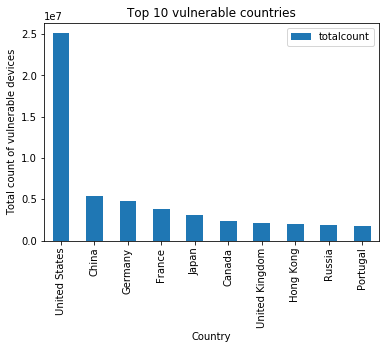

In [194]:
df_country.sort_values(by='totalcount', ascending=False).head(10)[['country','totalcount']].plot.bar(x='country')
plt.ylabel('Total count of vulnerable devices')
plt.xlabel('Country')
plt.title('Top 10 vulnerable countries')

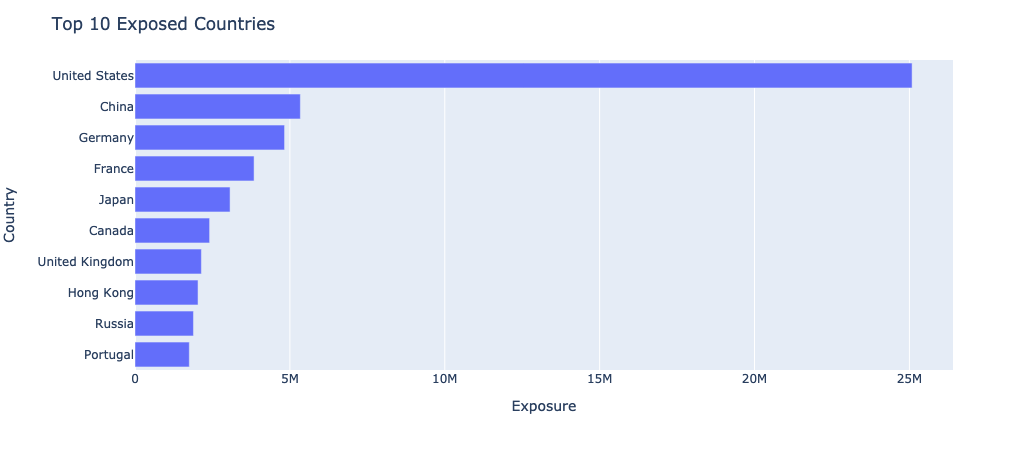

In [195]:
top10 = df_country.nlargest(10, ['totalcount'])

fig = px.bar(top10, x='totalcount', y='country',
             hover_data=['country', 'totalcount'], orientation='h',
              height=500)
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.update_layout(title='Top 10 Exposed Countries',
                  xaxis = dict(title='Exposure'),
                  yaxis = dict(title='Country'))
fig.show()

## 11.2 Country Populations

Text(0.5, 1.0, 'Top 10 populated countries')

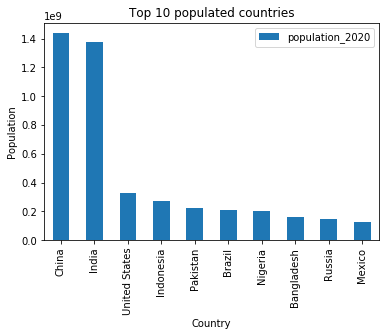

In [196]:
df_country.sort_values(by='population_2020', ascending=False).head(10)[['country','population_2020']].plot.bar(x='country')

plt.ylabel('Population')
plt.xlabel('Country')
plt.title('Top 10 populated countries')

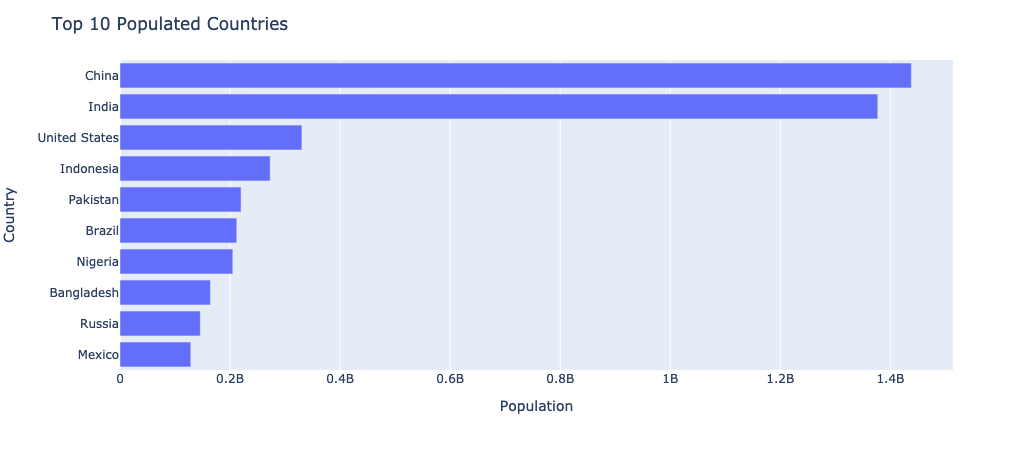

In [197]:
top10 = df_country.nlargest(10, ['population_2020'])

fig = px.bar(top10, x='population_2020', y='country',
             hover_data=['country', 'population_2020'], orientation='h',
              height=500)
fig.update_layout(yaxis={'categoryorder':'total ascending'})

fig.update_layout(title='Top 10 Populated Countries',
                  xaxis = dict(title='Population'),
                  yaxis = dict(title='Country'))
fig.show()

## 11.3 Population and Exposure Comparison 

In [198]:
df_population_exposure = df_country[['country','totalcount','population_2020']]
df_population_exposure = df_population_exposure.nlargest(10, ['population_2020'])

In [199]:
df_population_exposure

country  totalcount  population_2020
1            China     5337882     1.438207e+09
15           India     1085727     1.377234e+09
0    United States    25086476     3.306106e+08
23       Indonesia      548931     2.729317e+08
85        Pakistan       38956     2.199929e+08
12          Brazil     1541962     2.122532e+08
100        Nigeria       28660     2.050521e+08
63      Bangladesh       85117     1.643542e+08
8           Russia     1886986     1.459220e+08
40          Mexico      211710     1.286556e+08

Text(0, 0.5, '')

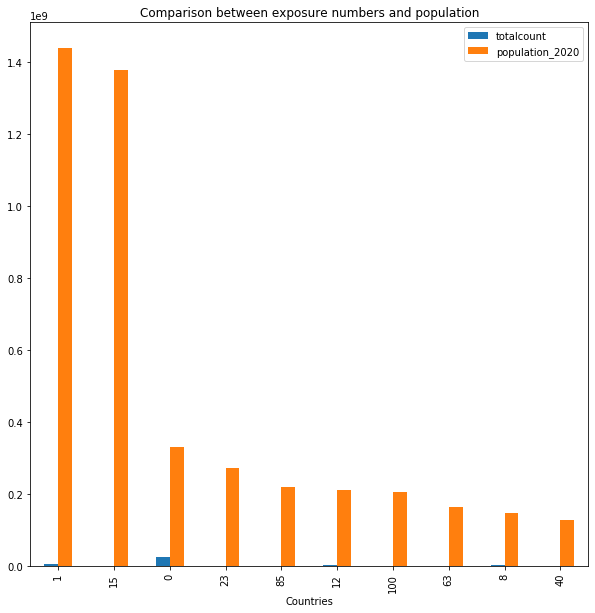

In [200]:
df_population_exposure.plot(kind='bar', stacked=False, figsize=(10,10))
plt.title("Comparison between exposure numbers and population")
plt.xlabel("Countries")
plt.ylabel("")
# Would prefer an interactive chart with hover feature. Need to fix X axis as it's labelling the countries as their IDs.
# Come back to fix - Divide

In [201]:
df_country[['country','totalcount','population_2020']]

country  totalcount  population_2020
0              United States    25086476     3.306106e+08
1                      China     5337882     1.438207e+09
2                    Germany     4827945     8.373022e+07
3                     France     3843896     6.524463e+07
4                      Japan     3069159     1.265528e+08
..                       ...         ...              ...
242                 Anguilla         207     1.497600e+04
243             Sint Maarten         195     4.277600e+04
244              South Sudan         135     1.116678e+07
245  Cocos (Keeling) Islands         124     6.000000e+02
246            Bouvet Island           0              NaN

[247 rows x 3 columns]

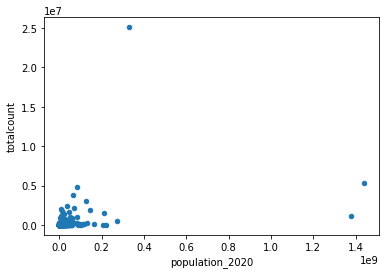

In [202]:
df_country.plot.scatter(x='population_2020',y='totalcount')

## 11.4 Gini Value

In [203]:
#see if there is any corelation between gini value and total vulnerabilities
df_country['gini_value'].corr(df_country['totalcount'])

0.0938409434598245

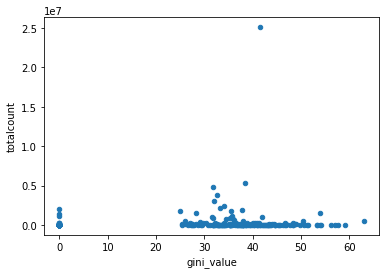

In [204]:
df_country.plot.scatter(x='gini_value',y='totalcount')

From the above there is no correlation between the distribution of wealth (according to Gini index) and number of vlunerabilities

## 11.5 Choropleth Maps

In [205]:
 def get_iso(col): 
    try:
        iso_3 =  country_name_to_country_alpha3(col)
    except:
        iso_3 = 'Unknown'
    return iso_3

df_country['iso_alpha'] = df_country['country'].apply(lambda x: get_iso(x))

import warnings
warnings.filterwarnings('ignore')
df_country['iso_alpha'].loc[df_country['country'] == "The Democratic Republic of the Congo"] = 'COD'
df_country['iso_alpha'].loc[df_country['country'] == "Czech Republic"] = 'CZE'
df_country['iso_alpha'].loc[df_country['country'] == "Palestine"] = 'PSE'

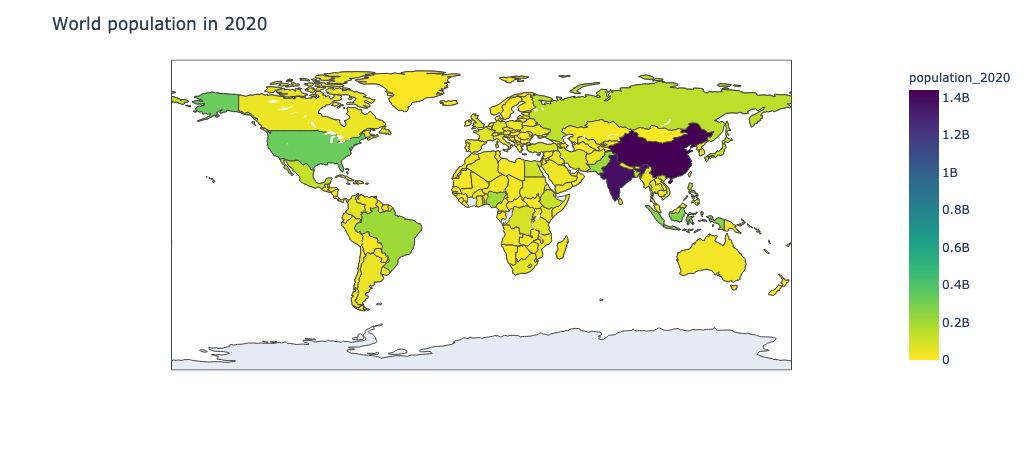

In [206]:
fig = px.choropleth(df_country, locations="iso_alpha",
                    color="population_2020",
                    hover_name="country",
                    color_continuous_scale='Viridis_r')
fig.update_layout(title_text="World population in 2020")
fig.show()

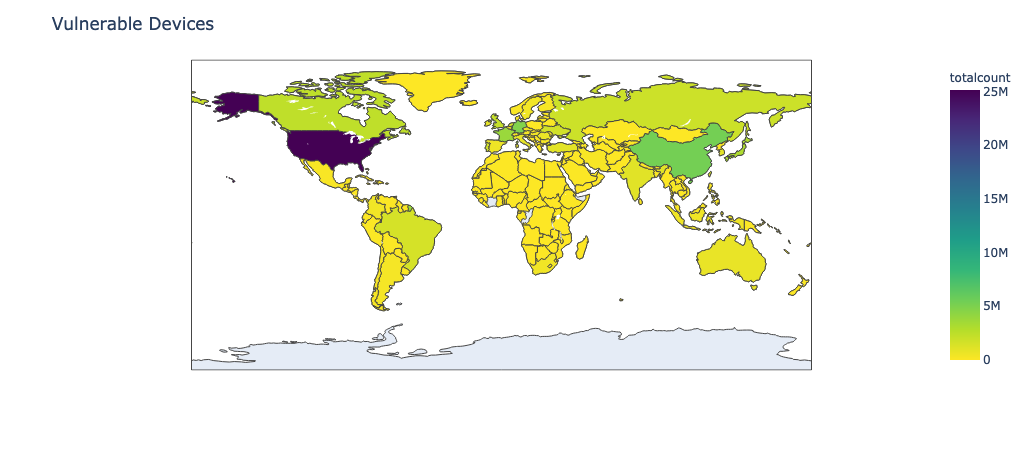

In [207]:
fig = px.choropleth(df_country, locations="iso_alpha",
                    color="totalcount",
                    hover_name="country",
                    color_continuous_scale='Viridis_r')
fig.update_layout(title_text="Vulnerable Devices")
fig.show()

# 12.0 Weekly CVE Numbers

In [208]:
df_cve=worksheet['exposure-count']
df_cve=df_cve[['vulnerability','totalcount']]
df_cve.sort_values(by='totalcount', ascending=False).head(10) 

vulnerability  totalcount
38   CVE-2017-15906     7203723
172   CVE-2018-1312     6849038
233   CVE-2019-0220     5596404
106   CVE-2017-7679     5517158
187  CVE-2018-17199     5198802
183  CVE-2018-15919     5181810
166   CVE-2018-1283     4911432
37   CVE-2017-15715     4911160
36   CVE-2017-15710     4910636
300   CVE-2019-9638     3865813

In [209]:
df_weekly="../data/weeklynumbers.csv"
df_weekly=pd.read_csv(df_weekly, index_col="capture_date", parse_dates=True)

#Need to work on finding a way to parse dates using worksheet instead of a seperate csv. 
#df_weekly=worksheet['weeklynumbers']

df_top10CVEs = df_weekly[['CVE-2017-15906', 'CVE-2018-1312','CVE-2018-15919','CVE-2017-7679','CVE-2019-0220',
                          'CVE-2018-17199','CVE-2018-1283','CVE-2017-15715','CVE-2017-15710','CVE-2019-9637']]
df_top10CVEs

CVE-2017-15906  CVE-2018-1312  CVE-2018-15919  CVE-2017-7679  \
capture_date                                                                 
2020-08-01           8089717        6867319         5806518        5582759   
2020-08-08           7990049        6859789         5747794        5569824   
2020-08-15           7929079        6906292         5714252        5600553   
2020-08-22           7683901        1092359           18199        5522970   
2020-08-29           7079614        6540104         5106263        5295995   
2020-09-05           5925549        6085202         4263266        4921915   
2020-09-12           7530353        6904310         5445335        5584696   
2020-09-19           7988549        7108337         5788056        5745584   

              CVE-2019-0220  CVE-2018-17199  CVE-2018-1283  CVE-2017-15715  \
capture_date                                                                 
2020-08-01          5410887         5069470        4796406         4796400   
2020-08-08          5425981         5080476        4806477         4806446   
2020-08-15          5478377         5125496        4848246         4848155   
2020-08-22           351036          108714          13702         4800215   
2020-08-29          5216022         4878552        4615137         4615330   
2020-09-05          4872918         4556906        4312544         4312255   
2020-09-12          5540873         5169082        4889644         4889540   
2020-09-19          5717586         5328348        5039818         5039899   

              CVE-2017-15710  CVE-2019-9637  
capture_date                                 
2020-08-01           4796365        4057307  
2020-08-08           4806413        4056023  
2020-08-15           4848114        3992470  
2020-08-22           4800174           4248  
2020-08-29           4615296        3632217  
2020-09-05           4312216        3326962  
2020-09-12           4889493        3864939  
2020-09-19           5039862        4045190

## 12.1 Line Plots

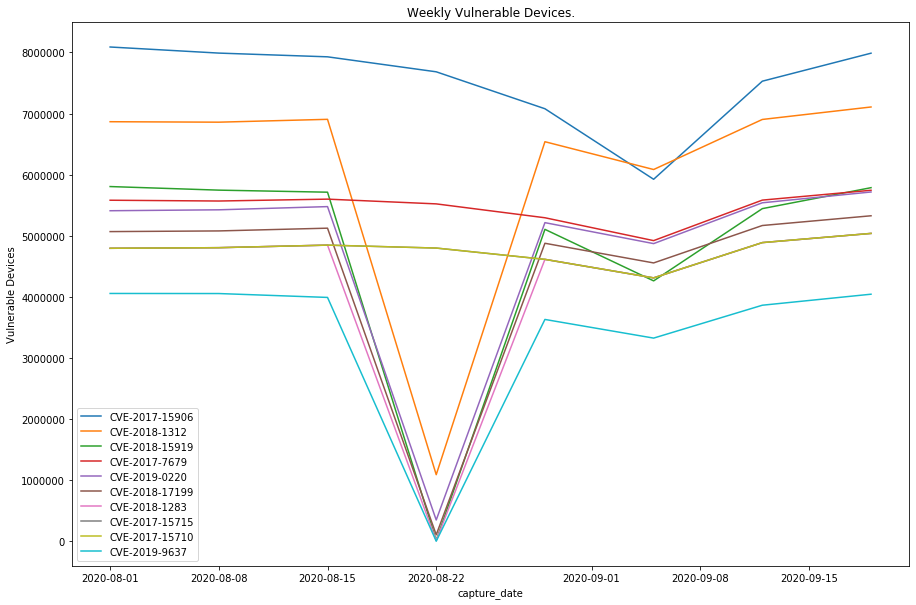

In [210]:
plt.figure(figsize=(15,10))
plt.title("Weekly Vulnerable Devices.")
plt.ylabel("Vulnerable Devices")
sns.lineplot(data=df_top10CVEs, dashes=False)